In [59]:
%load_ext autoreload
%autoreload 2

from utils.atm_stat import AtmStat
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
atmStat = AtmStat()


First let's compare the Kolmogorov and von Karman structure functions:

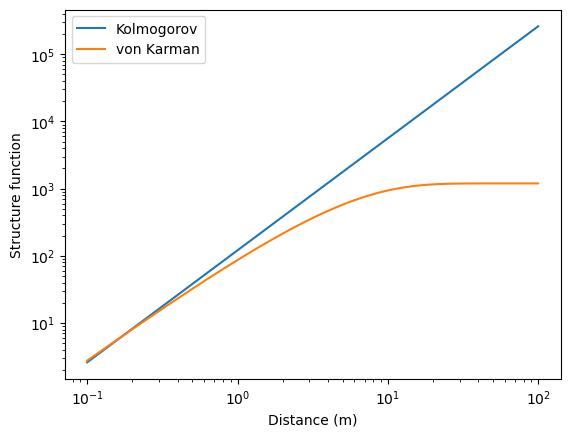

In [61]:
fig, ax = plt.subplots()

r = np.linspace(1e-1, 100, 10000)

# Kolmogorov
atmStat.set_params(L0=np.inf)
ax.plot(r, atmStat.structure(r), label="Kolmogorov")

# van Karman
atmStat.set_params(L0=30)
ax.plot(r, atmStat.structure(r), label="von Karman")

ax.set(xscale="log", yscale="log", xlabel="Distance (m)", ylabel="Structure function")
ax.legend()

plt.show()


Now let's plot the Zernike covariance:

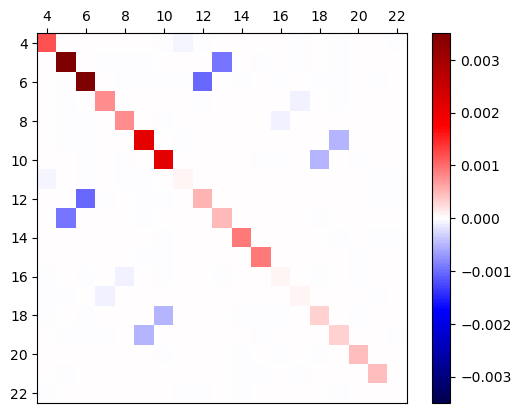

In [63]:
fig, ax = plt.subplots()

pos = ax.imshow(
    atmStat.zk_cov(),
    extent=(3.5, 22.5, 3.5, 22.5),
    vmin=-0.0035,
    vmax=0.0035,
    cmap="seismic",
)
fig.colorbar(pos)
ax.set(
    xticks=np.arange(4, 23, 2),
    yticks=np.arange(4, 23, 2),
    yticklabels=np.arange(4, 23, 2)[::-1],
)
ax.xaxis.tick_top()

plt.show()


and the standard deviation of each Zernike:

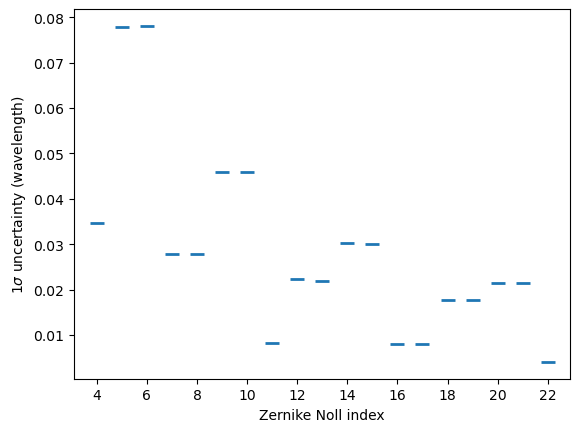

In [64]:
fig, ax = plt.subplots()

ax.scatter(np.arange(4, 23), atmStat.zk_std(), marker="_", s=100, lw=2)
ax.set(
    xlabel="Zernike Noll index",
    xticks=np.arange(4, 23, 2),
    ylabel="1$\sigma$ uncertainty (wavelength)",
)

plt.show()


Now let's investigate the cross-covariance for different lines of sight:

In [65]:
theta_covs = []
for theta in [0, 0.1, 0.2, 0.3, 0.4]:
    atmStat.set_params(theta=theta)
    theta_covs.append(atmStat.zk_cov())


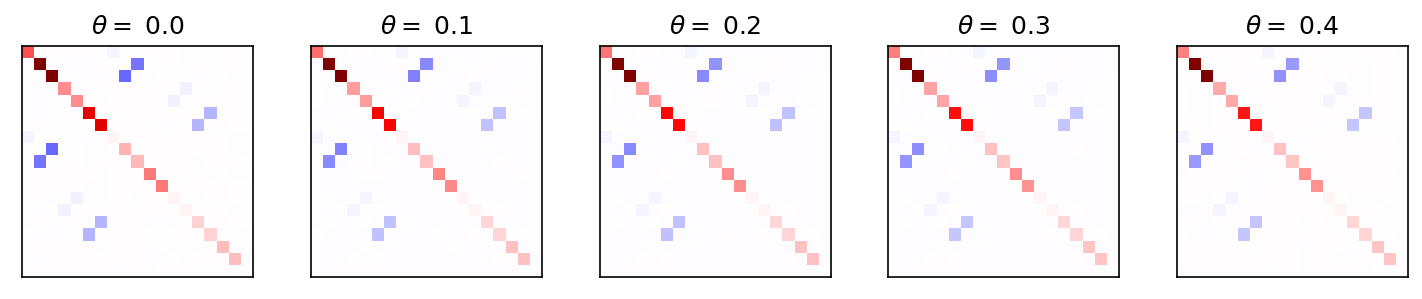

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(12, 2), dpi=150)

for i, theta in enumerate([0, 0.1, 0.2, 0.3, 0.4]):
    axes[i].imshow(
        theta_covs[i],
        vmin=-0.0035,
        vmax=0.0035,
        cmap="seismic",
    )
    axes[i].set(xticks=[], yticks=[], title=f"$\\theta =$ {theta:.1f}")

plt.show()


Let's calculate the Zernike RMSE as a function of the angle between two lines of sight:

In [67]:
theta = np.linspace(0, 8, 100)
theta_std = []
for th in theta:
    atmStat.set_params(theta=th)
    theta_std.append(atmStat.zk_std())
theta_std = np.array(theta_std)


In [68]:
RMSE_mean = np.sqrt(0.5 * np.sum(theta_std[0] ** 2 + theta_std**2, axis=1))
RMSE_std = np.sqrt(0.25 * np.sum(2 * theta_std[0] ** 4 + theta_std**4, axis=1))

rel_err_mean = RMSE_mean / RMSE_mean[0]
rel_err_std = RMSE_std / RMSE_mean[0]


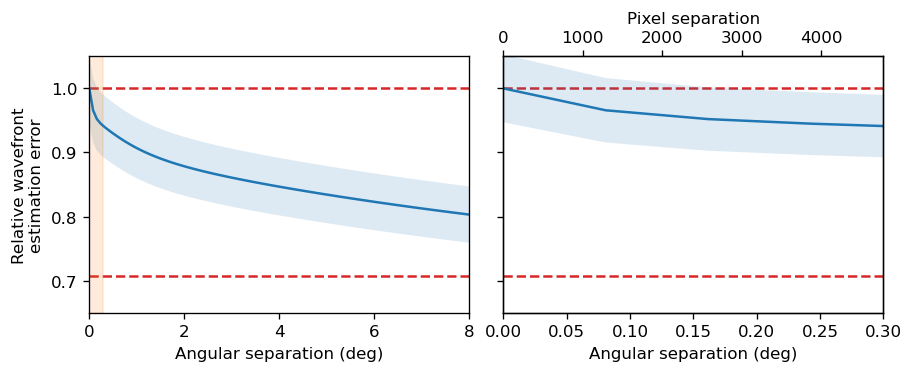

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 3), constrained_layout=True, dpi=120)

# full-view panel
ax1.plot(theta, rel_err_mean)
ax1.fill_between(
    theta,
    rel_err_mean - rel_err_std,
    rel_err_mean + rel_err_std,
    alpha=0.15,
)
ax1.set(
    xlabel="Angular separation (deg)",
    ylabel="Relative wavefront\nestimation error",
    xlim=(theta.min(), theta.max()),
    ylim=(0.65, 1.05),
)
ax1.axhline(1, c="C3", ls="--", zorder=0)
ax1.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

# zoom-in panel
ax2.plot(theta, rel_err_mean)
ax2.fill_between(
    theta,
    rel_err_mean - rel_err_std,
    rel_err_mean + rel_err_std,
    alpha=0.15,
)
ax2.set(
    xlabel="Angular separation (deg)",
    xlim=(theta.min(), 0.3),
    ylim=ax1.get_ylim(),
    yticklabels=[],
)
ax2.axhline(1, c="C3", ls="--", zorder=0)
ax2.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

# add a pixel axis to the zoom-in plot
ax2t = ax2.twiny()
ax2t.set_xlim(ax2.get_xlim())
ax1.axvspan(*ax2t.get_xlim(), color="C1", alpha=0.15)

pixel_ticks = np.arange(0, 5_000, 1000)
pixel_width = 0.2 / 3600  # degrees
pixel_diam = 2 * np.sqrt(pixel_width**2 / np.pi)
ax2t.set_xticks(pixel_ticks * pixel_diam)
ax2t.set_xticklabels(pixel_ticks)
ax2t.set(xlabel="Pixel separation")


plt.show()


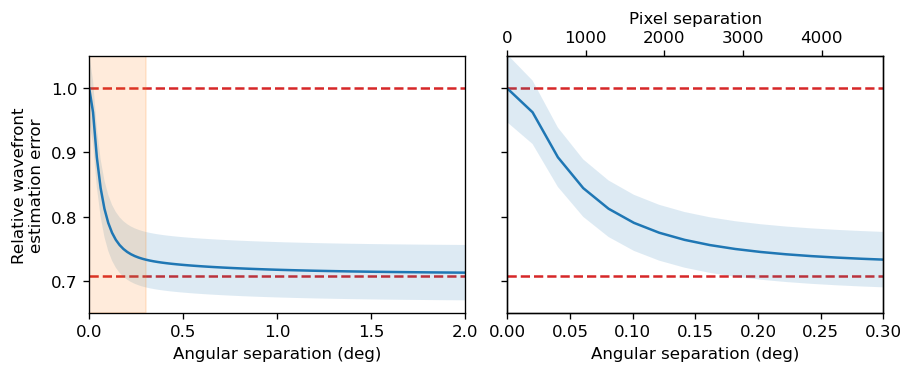

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 3), constrained_layout=True, dpi=120)

# full-view panel
ax1.plot(theta, rel_err_mean)
ax1.fill_between(
    theta,
    rel_err_mean - rel_err_std,
    rel_err_mean + rel_err_std,
    alpha=0.15,
)
ax1.set(
    xlabel="Angular separation (deg)",
    ylabel="Relative wavefront\nestimation error",
    xlim=(theta.min(), theta.max()),
    ylim=(0.65, 1.05),
)
ax1.axhline(1, c="C3", ls="--", zorder=0)
ax1.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

# zoom-in panel
ax2.plot(theta, rel_err_mean)
ax2.fill_between(
    theta,
    rel_err_mean - rel_err_std,
    rel_err_mean + rel_err_std,
    alpha=0.15,
)
ax2.set(
    xlabel="Angular separation (deg)",
    xlim=(theta.min(), 0.3),
    ylim=ax1.get_ylim(),
    yticklabels=[],
)
ax2.axhline(1, c="C3", ls="--", zorder=0)
ax2.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

# add a pixel axis to the zoom-in plot
ax2t = ax2.twiny()
ax2t.set_xlim(ax2.get_xlim())
ax1.axvspan(*ax2t.get_xlim(), color="C1", alpha=0.15)

pixel_ticks = np.arange(0, 5_000, 1000)
pixel_width = 0.2 / 3600  # degrees
pixel_diam = 2 * np.sqrt(pixel_width**2 / np.pi)
ax2t.set_xticks(pixel_ticks * pixel_diam)
ax2t.set_xticklabels(pixel_ticks)
ax2t.set(xlabel="Pixel separation")


plt.show()


In [63]:
atmStat.params["Cn2"][1, :-6].sum()


0.00030186919017545597

In [64]:
atmStat.params["Cn2"][1, -6:].sum()


0.0003821253115277605

In [7]:
from utils.atm_stat import cp_profile
from scipy.integrate import simps


In [3]:
cn2 = cp_profile(10)


In [8]:
simps(cn2[1, :-6], cn2[0, :-6])


0.07249187193395999

In [9]:
simps(cn2[1, -6:], cn2[0, -6:])


3.8

In [12]:
cn2[1, -6:].sum()


1.5

In [ ]:
atmStat.set_params(theta=0)
var = atmStat.zk_cov()

theta = np.linspace(0, 8, 100)
rmse = []
for th in theta:
    atmStat.set_params(theta=th)
    cov = atmStat.zk_cov()
    rmse.append(np.sqrt(0.5 * np.sum(np.diag(var) + np.diag(cov))))
rmse = np.array(rmse)


In [3]:
theta = np.concatenate((np.linspace(0, 0.4, 20), np.linspace(0.4, 8, 81)[1:]))
std = []
for th in theta:
    atmStat.set_params(theta=th)
    std.append(atmStat.zk_std())
std = np.array(std)


In [4]:
RMSE_mean = np.sqrt(0.5 * np.sum(std[0] ** 2 + std**2, axis=1))
RMSE_std = np.sqrt(0.25 * np.sum(2 * std[0] ** 4 + std**4, axis=1))

rel_err_mean = RMSE_mean / RMSE_mean[0]
rel_err_std = RMSE_std / RMSE_mean[0]


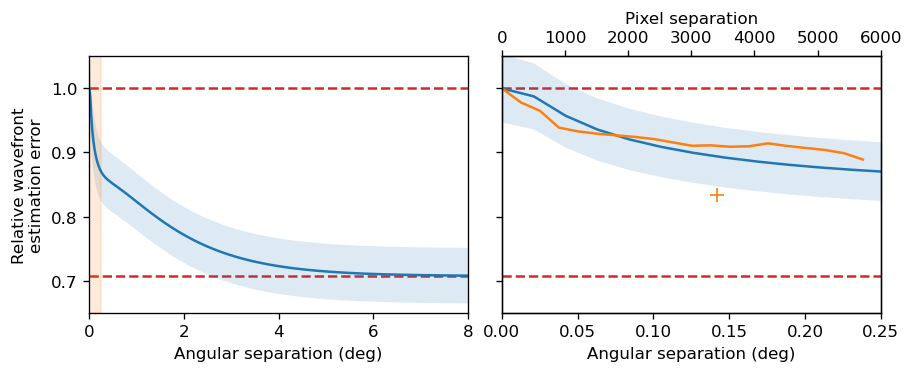

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 3), constrained_layout=True, dpi=120)

ax1.plot(theta, rel_err_mean)
ax1.fill_between(
    theta, rel_err_mean - rel_err_std, rel_err_mean + rel_err_std, alpha=0.15
)
ax1.set(
    xlabel="Angular separation (deg)",
    ylabel="Relative wavefront\nestimation error",
    xlim=(theta.min(), theta.max()),
    ylim=(0.65, 1.05),
)
ax1.axhline(1, c="C3", ls="--", zorder=0)
ax1.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

ax2.plot(theta, rel_err_mean)
ax2.fill_between(
    theta, rel_err_mean - rel_err_std, rel_err_mean + rel_err_std, alpha=0.15
)
ax2.set(
    xlabel="Angular separation (deg)",
    xlim=(theta.min(), 0.25),
    ylim=ax1.get_ylim(),
    yticklabels=[],
)
ax2.axhline(1, c="C3", ls="--", zorder=0)
ax2.axhline(1 / np.sqrt(2), c="C3", ls="--", zorder=0)

xd = np.arange(0, 3900, 200)
yd = np.array(
    [
        1,
        0.978,
        0.965,
        0.96,
        0.955,
        0.952,
        0.95,
        0.948,
        0.945,
        0.94,
        0.935,
        0.936,
        0.934,
        0.935,
        0.94,
        0.936,
        0.933,
        0.930,
        0.925,
        0.915,
    ]
)
yd[3:] *= (1 / (xd[3:] + 1)) ** (0.0035)
ax2.plot(xd * pixel_diam, yd)


ax2t = ax2.twiny()
ax2t.set_xlim(ax2.get_xlim())
ax1.axvspan(*ax2t.get_xlim(), color="C1", alpha=0.15)

pixel_ticks = np.arange(0, 7_000, 1000)
pixel_width = 0.2 / 3600  # degrees
pixel_diam = 2 * np.sqrt(pixel_width**2 / np.pi)
ax2t.set_xticks(pixel_ticks * pixel_diam)
ax2t.set_xticklabels(pixel_ticks)
ax2t.set(xlabel="Pixel separation")

# determine the average donut separation
rng = np.random.default_rng(0)
x = rng.uniform(0, 4000, size=(2, 10_000))
y = rng.uniform(0, 2000, size=(2, 10_000))
y[1] *= -1
r = pixel_width * np.sqrt((x[0] - x[1]) ** 2 + (y[0] - y[1]) ** 2)
rmean = r.mean()

# and plot the point from my paper
ax2.scatter(rmean, 1 / 1.2, marker="+", c="C1", s=75, lw=1)


plt.show()


Some simulations for validation.

In [2]:
from utils.simulator import DonutSimulator
from itertools import combinations

from lsst.ts.wep.wfEstimator import WfEstimator
from lsst.ts.wep.utility import getConfigDir, DefocalType, FilterType


In [3]:
simulator = DonutSimulator()


In [6]:
zk_pred = np.load("data/zk_predictions.npz", allow_pickle=True)

truth = np.array([i for i in zk_pred["truth"]])
idx = np.where(np.max(truth, axis=1) > 0.2)

truth = truth[idx]
extra = zk_pred["mlExtra"][idx]
intra = zk_pred["mlIntra"][idx]

mean_err = np.mean(
    (
        np.sqrt(np.sum(np.square(extra - truth), axis=1)),
        np.sqrt(np.sum(np.square(intra - truth), axis=1)),
    ),
    axis=0,
)
idx = np.argmin(np.abs(mean_err - np.sqrt(np.sum(np.square(atmStat.zk_std())))))
zk_true = truth[idx]

simulator.set_wf_dev(zk_true)


In [9]:
wfEst = WfEstimator(f"{getConfigDir()}/cwfs/algo")
wfEst.config(sizeInPix=160, algo="ml")


In [10]:
N = 1000  # number of stars per chip

stars = []
zk = []

simulator.simulator.atm_bool = True
simulator.set_seed(42)
for _ in range(N):
    star = simulator.simulate_star(angle=None, background=1, intra=False)
    stars.append(star)

    wfEst.reset()
    wfEst.setImg(
        star.angle,
        DefocalType.Extra,
        filterLabel=FilterType[f"LSST_{star.band.capitalize()}"],
        image=star.stamp.copy(),
    )
    zk.append(wfEst.calWfsErr() / 1e3)

    star = simulator.simulate_star(angle=None, background=1, intra=True)
    stars.append(star)

    wfEst.reset()
    wfEst.setImg(
        star.angle,
        DefocalType.Intra,
        filterLabel=FilterType[f"LSST_{star.band.capitalize()}"],
        image=star.stamp.copy(),
    )
    zk.append(wfEst.calWfsErr() / 1e3)

zk = np.array(zk)


In [11]:
pairs = list(combinations(range(len(stars)), 2))

distances = [
    np.sqrt(np.sum(np.square(stars[pair[0]].centroid - stars[pair[1]].centroid)))
    for pair in pairs
]

zk_mean = zk[pairs].mean(axis=-2)
errs = np.sqrt(np.sum(np.square(zk_mean - zk_true), axis=-1))


In [24]:
pairs


array([[   0,    1],
       [   0,    2],
       [   0,    3],
       ...,
       [1997, 1998],
       [1997, 1999],
       [1998, 1999]])

In [25]:
errs0 = np.sqrt(np.sum(np.square(zk[pairs[:, 0]] - zk_true), axis=-1))


In [12]:
np.savez("data/atm_field_angle_test.npz", distances=distances, errs=errs)


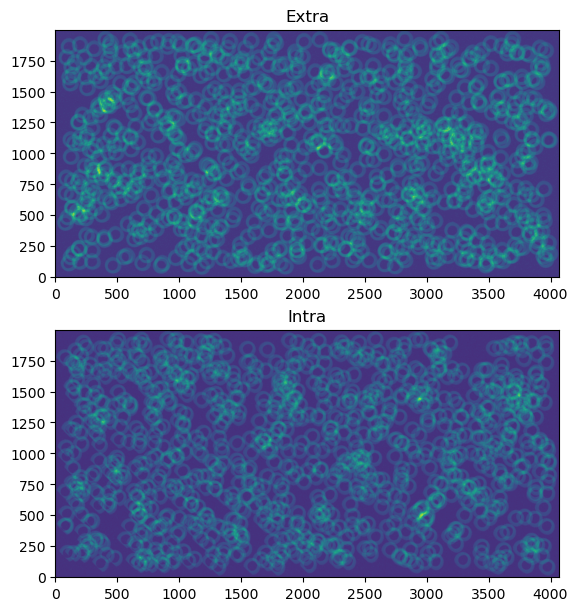

In [13]:
extra_img = np.zeros_like(stars[0].image)
for star in stars[0::2]:
    extra_img += star.image

intra_img = np.zeros_like(stars[0].image)
for star in stars[1::2]:
    intra_img += star.image

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), constrained_layout=True)

ax1.imshow(extra_img, origin="lower")
ax1.set(title="Extra")

ax2.imshow(intra_img, origin="lower")
ax2.set(title="Intra")

plt.show()


In [14]:
pairs = list(combinations(range(len(stars)), 2))

distances = [
    np.sqrt(np.sum(np.square(stars[pair[0]].centroid - stars[pair[1]].centroid)))
    for pair in pairs
]

zk_mean = zk[pairs].mean(axis=-2)
errs = np.sqrt(np.sum(np.square(zk_mean - zk_true), axis=-1))


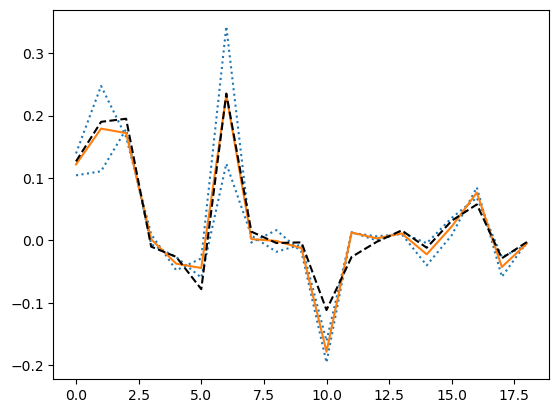

In [15]:
plt.plot(zk[pairs[0][0]], c="C0", ls=":")
plt.plot(zk[pairs[0][1]], c="C0", ls=":")
plt.plot(zk_mean[0], c="C1")
plt.plot(zk_true, c="k", ls="--")


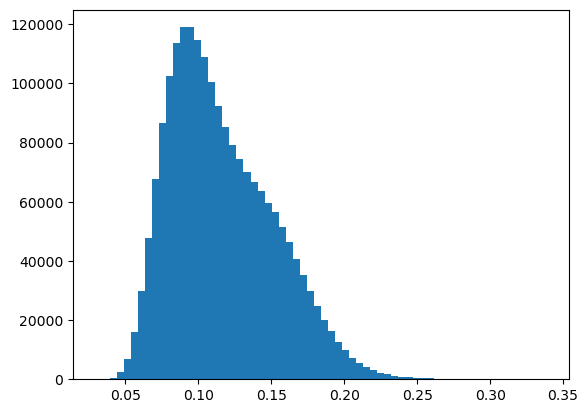

In [16]:
plt.hist(errs, bins=64)


In [43]:
bins = np.arange(0, 4100, 200)
running_mean = []
running_std = []
normed_errs = errs / errs0
normed_errs /= np.median(normed_errs[(distances > bins[0]) & (distances < bins[1])])
for i in range(len(bins) - 1):
    idx = (distances > bins[i]) & (distances < bins[i + 1])
    bin_errs = normed_errs[idx]
    running_mean.append(np.median(bin_errs))
    running_std.append(np.subtract(*np.percentile(bin_errs, [75, 25])) / 1.349)


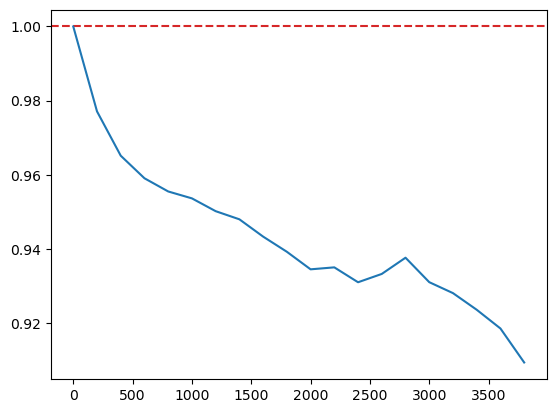

In [45]:
plt.errorbar(bins[:-1], running_mean)  # , yerr=running_std)
plt.axhline(1, c="C3", ls="--")


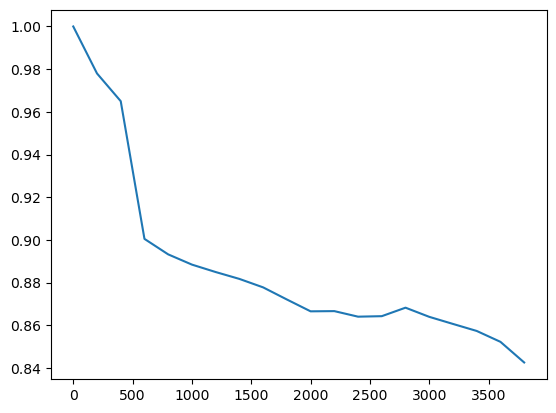

In [44]:
xd = np.arange(0, 3900, 200)
yd = np.array(
    [
        1,
        0.978,
        0.965,
        0.96,
        0.955,
        0.952,
        0.95,
        0.948,
        0.945,
        0.94,
        0.935,
        0.936,
        0.934,
        0.935,
        0.94,
        0.936,
        0.933,
        0.930,
        0.925,
        0.915,
    ]
)
yd[3:] *= (1 / (xd[3:] + 1)) ** (0.01)
plt.plot(xd, yd)


In [ ]:
N = 100

stars = {
    "no atm": [],
    "atm": [],
}

zk = {
    "no atm": [],
    "atm": [],
}

simulator.simulator.atm_bool = False
simulator.set_seed(42)
for _ in range(N):
    star = simulator.simulate_star(angle=None, background=1)
    stars["no atm"].append(star)

    wfEst.reset()
    wfEst.setImg(
        star.angle,
        DefocalType.Extra,
        filterLabel=FilterType[f"LSST_{star.band.capitalize()}"],
        image=star.stamp.copy(),
    )
    zk["no atm"].append(wfEst.calWfsErr() / 1e3)

simulator.simulator.atm_bool = True
simulator.set_seed(42)
for _ in range(N):
    star = simulator.simulate_star(angle=None, background=1)
    stars["atm"].append(star)

    wfEst.reset()
    wfEst.setImg(
        star.angle,
        DefocalType.Extra,
        filterLabel=FilterType[f"LSST_{star.band.capitalize()}"],
        image=star.stamp.copy(),
    )
    zk["atm"].append(wfEst.calWfsErr() / 1e3)

zk["resid"] = np.subtract(zk["atm"], zk["no atm"])


In [ ]:
no_atm_image = stars["no atm"][0].image.copy()
for star in stars["no atm"][1:]:
    no_atm_image += star.image

atm_image = stars["atm"][0].image.copy()
for star in stars["atm"][1:]:
    atm_image += star.image


[Text(0.5, 1.0, 'Atm')]

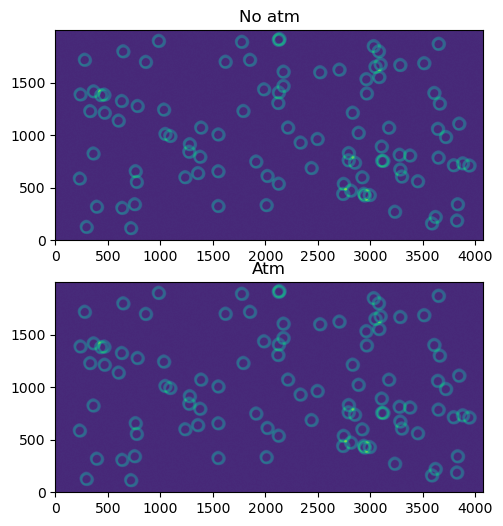

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

ax1.imshow(no_atm_image, origin="lower")
ax1.set(title="No atm")

ax2.imshow(atm_image, origin="lower")
ax2.set(title="Atm")


In [ ]:
pairs = list(combinations(range(N), 2))

distances = [
    np.sqrt(
        np.sum(
            np.square(
                stars["no atm"][pair[0]].centroid - stars["no atm"][pair[1]].centroid
            )
        )
    )
    for pair in pairs
]

atm_errs0 = [np.sqrt(np.sum(np.square(zk["resid"][pair[0]]))) for pair in pairs]

atm_errs = [
    np.sqrt(np.sum(np.square(np.mean(zk["resid"][(pair,)], axis=0)))) for pair in pairs
]


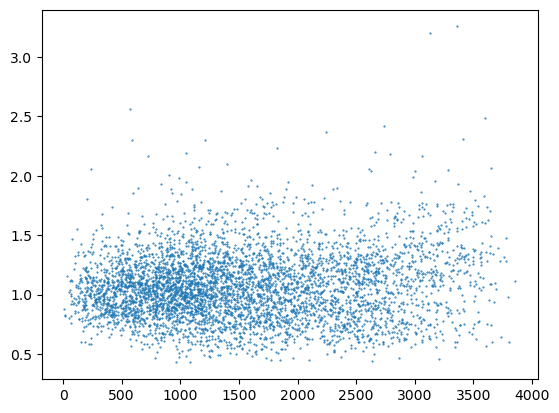

In [ ]:
plt.scatter(distances, np.divide(atm_errs0, atm_errs), marker=".", s=1)


In [ ]:
atm_errs = np.array(atm_errs)


bins = np.arange(0, 4100, 200)
y = []
for i in range(len(bins) - 1):
    y.append(np.mean(atm_errs[(distances > bins[i]) & (distances < bins[i + 1])]))


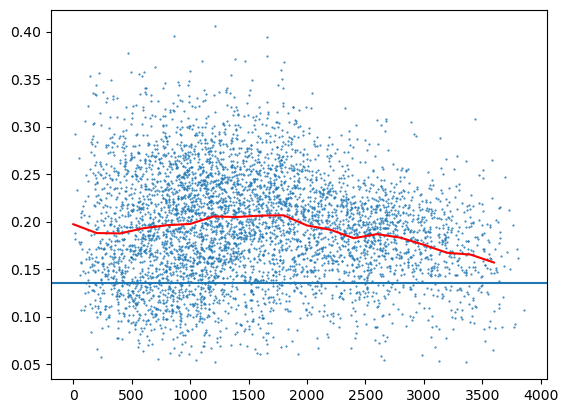

In [ ]:
plt.scatter(distances, atm_errs, marker=".", s=1)
plt.plot(bins[:-2], y[:-1], c="r")
plt.axhline(np.sqrt(np.sum(np.diag(var))))


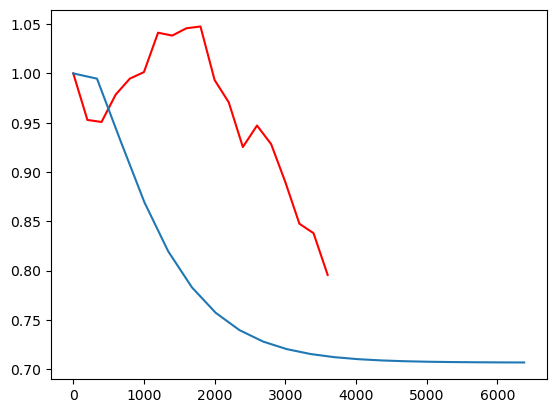

In [ ]:
plt.plot(bins[:-2], y[:-1] / y[0], c="r")
plt.plot(theta / pixel_diam, rmse / rmse[0])


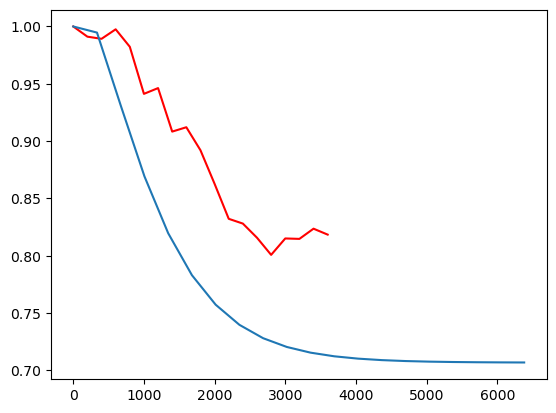

In [ ]:
plt.plot(bins[:-2], y[:-1] / y[0], c="r")
plt.plot(theta / pixel_diam, rmse / rmse[0])


In [ ]:
1 / np.sqrt(2)


0.7071067811865475

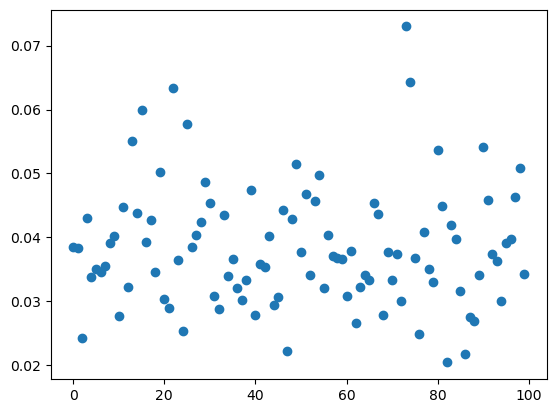

In [ ]:
plt.scatter(np.arange(100), np.sqrt(np.sum(np.square(zk["resid"]), axis=1)))


In [128]:
dir(atmStat)


['N',
 '_R',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_unique',
 '_area',
 '_dOmega',
 '_eps',
 '_idx_unique',
 '_params',
 '_rho_shape',
 '_rho_unique',
 '_setup_zk_arrays',
 '_zk',
 '_zk_update_req',
 'airmass',
 'correlation',
 'inst',
 'params',
 'psf_fwhm',
 'r0',
 'r0_ref',
 'set_params',
 'structure',
 't0',
 'zk_cov',
 'zk_std']

In [131]:
atmStat._idx_unique


array([ 0,  7, 52, ..., 52,  7,  0])

In [138]:
from scipy.spatial.distance import cdist


In [230]:
x, y = np.meshgrid(np.arange(3), np.arange(3))
points = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)])
d = cdist(points[:1], points)
d.reshape(3, 3)


array([[0.        , 1.        , 2.        ],
       [1.        , 1.41421356, 2.23606798],
       [2.        , 2.23606798, 2.82842712]])

In [233]:
x


array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [232]:
x[np.tril_indices(N, 0)]


array([0, 0, 1, 0, 1, 2])

In [215]:
du, di = np.unique(d, return_inverse=True)


In [222]:
du[di.reshape(d.shape)]


array([[[[0.        , 1.        , 2.        ],
         [1.        , 1.41421356, 2.23606798],
         [2.        , 2.23606798, 2.82842712]],

        [[1.        , 0.        , 1.        ],
         [1.41421356, 1.        , 1.41421356],
         [2.23606798, 2.        , 2.23606798]],

        [[2.        , 1.        , 0.        ],
         [2.23606798, 1.41421356, 1.        ],
         [2.82842712, 2.23606798, 2.        ]]],


       [[[1.        , 1.41421356, 2.23606798],
         [0.        , 1.        , 2.        ],
         [1.        , 1.41421356, 2.23606798]],

        [[1.41421356, 1.        , 1.41421356],
         [1.        , 0.        , 1.        ],
         [1.41421356, 1.        , 1.41421356]],

        [[2.23606798, 1.41421356, 1.        ],
         [2.        , 1.        , 0.        ],
         [2.23606798, 1.41421356, 1.        ]]],


       [[[2.        , 2.23606798, 2.82842712],
         [1.        , 1.41421356, 2.23606798],
         [0.        , 1.        , 2.        

In [221]:
du[di].reshape(d.shape)


array([[[[0.        , 1.        , 2.        ],
         [1.        , 1.41421356, 2.23606798],
         [2.        , 2.23606798, 2.82842712]],

        [[1.        , 0.        , 1.        ],
         [1.41421356, 1.        , 1.41421356],
         [2.23606798, 2.        , 2.23606798]],

        [[2.        , 1.        , 0.        ],
         [2.23606798, 1.41421356, 1.        ],
         [2.82842712, 2.23606798, 2.        ]]],


       [[[1.        , 1.41421356, 2.23606798],
         [0.        , 1.        , 2.        ],
         [1.        , 1.41421356, 2.23606798]],

        [[1.41421356, 1.        , 1.41421356],
         [1.        , 0.        , 1.        ],
         [1.41421356, 1.        , 1.41421356]],

        [[2.23606798, 1.41421356, 1.        ],
         [2.        , 1.        , 0.        ],
         [2.23606798, 1.41421356, 1.        ]]],


       [[[2.        , 2.23606798, 2.82842712],
         [1.        , 1.41421356, 2.23606798],
         [0.        , 1.        , 2.        

In [158]:
di[41:][::-1]


array([0, 1, 3, 1, 2, 4, 3, 4, 5, 1, 0, 1, 2, 1, 2, 4, 3, 4, 3, 1, 0, 4,
       2, 1, 5, 4, 3, 1, 2, 4, 0, 1, 3, 1, 2, 4, 2, 1, 2, 1])

In [223]:
# we will use this clever method to quickly generate the unique index matrix
N = 3

# first create a lower triangular matrix where the pixels on the lower diagonal
# have values equal to the ranking of their euclidean distance from the top left
N = 3
X = np.zeros((N, N), dtype=int)
X[np.tril_indices(N, 0)] = np.arange(6)

# now copy the lower triangular values to the upper triangle
X = X + X.T - np.diag(np.diag(X))

# now we will copy this block to all 4 quadrants of a larger matrix so
# that all pixels are ranked by their euclidean distance from the center
X = np.hstack((np.flip(X, axis=1)[:, :-1], X))
X = np.vstack((np.flip(X, axis=0)[:-1, :], X))

# now we will slide a window over this matrix to generate
# all of the sub-matrices with euclidean distance rankings
X = np.lib.stride_tricks.sliding_window_view(X, (N, N))

# we only need the flattened array of rankings
X = X.flatten()

X


array([5, 4, 3, 4, 2, 1, 3, 1, 0, 4, 3, 4, 2, 1, 2, 1, 0, 1, 3, 4, 5, 1,
       2, 4, 0, 1, 3, 4, 2, 1, 3, 1, 0, 4, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 4, 0, 1, 3, 1, 2, 4, 3, 1, 0, 4, 2, 1, 5, 4, 3, 1, 0, 1,
       2, 1, 2, 4, 3, 4, 0, 1, 3, 1, 2, 4, 3, 4, 5])

In [192]:
N = 3
X = np.zeros((N, N), dtype=int)
X[np.tril_indices(3, 0)] = np.arange(6)
X = X + X.T - np.diag(np.diag(X))
X = np.hstack((np.flip(X, axis=1)[:, :-1], X))
X = np.vstack((np.flip(X, axis=0)[:-1, :], X))
X


array([[5, 4, 3, 4, 5],
       [4, 2, 1, 2, 4],
       [3, 1, 0, 1, 3],
       [4, 2, 1, 2, 4],
       [5, 4, 3, 4, 5]])

In [207]:
np.lib.stride_tricks.sliding_window_view(X, (3, 3)).flatten()


array([5, 4, 3, 4, 2, 1, 3, 1, 0, 4, 3, 4, 2, 1, 2, 1, 0, 1, 3, 4, 5, 1,
       2, 4, 0, 1, 3, 4, 2, 1, 3, 1, 0, 4, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 4, 0, 1, 3, 1, 2, 4, 3, 1, 0, 4, 2, 1, 5, 4, 3, 1, 0, 1,
       2, 1, 2, 4, 3, 4, 0, 1, 3, 1, 2, 4, 3, 4, 5])

In [201]:
d.shape


(3, 3, 3, 3)

In [204]:
di


array([0, 1, 3, 1, 2, 4, 3, 4, 5, 1, 0, 1, 2, 1, 2, 4, 3, 4, 3, 1, 0, 4,
       2, 1, 5, 4, 3, 1, 2, 4, 0, 1, 3, 1, 2, 4, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 4, 2, 1, 3, 1, 0, 4, 2, 1, 3, 4, 5, 1, 2, 4, 0, 1, 3, 4, 3, 4,
       2, 1, 2, 1, 0, 1, 5, 4, 3, 4, 2, 1, 3, 1, 0])

In [254]:
from lsst.ts.wep.cwfs.instrument import Instrument
from lsst.ts.wep.utility import CamType

import galsim


In [236]:
inst = Instrument()
inst.configFromFile(
    dimOfDonutImgOnSensor=200,
    camType=CamType["LsstCam"],
)


In [238]:
xSensor, ySensor = inst.getSensorCoor()


In [241]:
xSensor


array([[-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381],
       [-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381],
       [-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381],
       ...,
       [-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381],
       [-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381],
       [-1.63643381, -1.61998724, -1.60354067, ...,  1.60354067,
         1.61998724,  1.63643381]])

In [ ]:
xPupil, yPupil = 

In [357]:
N = 6  # number of pupil pixels
R = 8.4  # radius of telescope mirror in meters
eps = 0.61  # fractional obscuration of the telescope

# create the pupil grid
yPupil, xPupil = np.mgrid[-1 : 1 : 1j * N, -1 : 1 : 1j * N]
r = np.sqrt(xPupil**2 + yPupil**2)

# create the Zernike basis
zk = galsim.zernike.zernikeBasis(
    22,
    xPupil,
    yPupil,
    R_inner=eps,
)[4:]

# mask outside the pupil
zk *= (r > eps) & (r < 1)

# normalize the Zernikes to 1
# zk *= np.sqrt((xPupil[0, 1] - xPupil[0, 0]) * (yPupil[1, 0] - yPupil[0, 0]) / (np.pi * (1 - eps**2)))
zk /= np.sqrt(np.diag(np.einsum("jab,kab->jk", zk, zk)))[:, None, None]

# calculate the matrix of distances from the upper corner
# this matrix contains all the unique distances that will appear in our calculations
# and we really only need to save the list of unique values
rho = R * cdist([[-1, -1]], np.vstack([xPupil.flatten(), yPupil.flatten()]).T)
rho_unique = np.unique(rho)

# now we will use a clever method to generate a matrix of indices that will
# tell us how to map the list of unique distances into a big tensor that contains
# the pairwise distances between every pair of pupil pixels

# first create a lower triangular matrix where the pixels on the lower diagonal
# have values equal to the ranking of their euclidean distance from the top left
X = np.zeros((N, N), dtype=int)
X[np.tril_indices(N, 0)] = np.arange(X[np.tril_indices(N, 0)].size)

# now copy the lower triangular values to the upper triangle
X = X + X.T - np.diag(np.diag(X))

# now we will copy this block to all 4 quadrants of a larger matrix so
# that all pixels are ranked by their euclidean distance from the center
X = np.hstack((np.flip(X, axis=1)[:, :-1], X))
X = np.vstack((np.flip(X, axis=0)[:-1, :], X))

# now we will slide a window over this matrix to generate
# all of the sub-matrices with euclidean distance rankings
rho_idx = np.lib.stride_tricks.sliding_window_view(X, (N, N))


In [355]:
X = np.zeros((N, N), dtype=int)
X[np.tril_indices(N, 0)] = np.arange(X[np.tril_indices(N, 0)].size)


In [353]:
X[np.tril_indices(N, 0)]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [354]:
np.tril_indices(N, 0)


(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5]))

In [358]:
inst.apertureDiameter


8.36

In [39]:
from utils.atm_stat import AtmStat
import numpy as np
import galsim
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [2]:
atmStat = AtmStat()


In [3]:
atmStat.zk_std()


IndexError: index 5049 is out of bounds for axis 0 with size 4109

In [5]:
atmStat._rho_unique.size


4109

In [6]:
atmStat._rho_idx


array([[[[5049, 5048, 5047, ..., 4952, 4951, 4950],
         [5048, 4949, 4948, ..., 4853, 4852, 4851],
         [5047, 4948, 4850, ..., 4755, 4754, 4753],
         ...,
         [4952, 4853, 4755, ...,    5,    4,    3],
         [4951, 4852, 4754, ...,    4,    2,    1],
         [4950, 4851, 4753, ...,    3,    1,    0]],

        [[5048, 5047, 5046, ..., 4951, 4950, 4951],
         [4949, 4948, 4947, ..., 4852, 4851, 4852],
         [4948, 4850, 4849, ..., 4754, 4753, 4754],
         ...,
         [4853, 4755, 4658, ...,    4,    3,    4],
         [4852, 4754, 4657, ...,    2,    1,    2],
         [4851, 4753, 4656, ...,    1,    0,    1]],

        [[5047, 5046, 5045, ..., 4950, 4951, 4952],
         [4948, 4947, 4946, ..., 4851, 4852, 4853],
         [4850, 4849, 4848, ..., 4753, 4754, 4755],
         ...,
         [4755, 4658, 4562, ...,    3,    4,    5],
         [4754, 4657, 4561, ...,    1,    2,    4],
         [4753, 4656, 4560, ...,    0,    1,    3]],

        ...,

  

In [25]:
import galsim


In [173]:
a = []
b = []
c = []


N = 120
D = 8.4
eps = 0.61

# create the pupil grid
yPupil, xPupil = np.mgrid[-1 : 1 : 1j * N, -1 : 1 : 1j * N]

# create the Zernike basis
zk = galsim.zernike.zernikeBasis(
    22,
    xPupil,
    yPupil,
    R_inner=eps,
)[4:]

# mask outside the pupil
rPupil = np.sqrt(xPupil**2 + yPupil**2)
zk *= (rPupil > eps) & (rPupil < 1)

# normalize the Zernikes to 1
zk *= np.sqrt(
    (xPupil[0, 1] - xPupil[0, 0])
    * (yPupil[1, 0] - yPupil[0, 0])
    / (np.pi * (1 - eps**2))
)
# zk /= np.sqrt(np.diag(np.einsum("jab,kab->jk", zk, zk)))[:, None, None]
zk = zk

# get the list of unique distances between any two points on the pupil
points = np.vstack([xPupil.flatten(), yPupil.flatten()]).T
rho_unique = D / 2 * np.unique(cdist(points, points))

# We also want to get a list of where all the unique values of rho live
# inside the giant tensor of distances between every pair of pupil points.
# This is so we can calculate correlations for only the unique distances,
# and then use these indices to fill in the rest of the tensor.

# You can do this by setting return_inverse=True inside np.unique, but this
# is very slow! Instead, we will be clever and exploit the fact that np.unique
# returns values of rho in increasing order. So we will generate a tensor that
# assigns each point-to-point distance to it's ranking in the unique values.

# first create a lower triangular matrix where the points on the lower triangle
# have values equal to the ranking of their euclidean distance from the top left
X = np.zeros((N, N), dtype=int)
X[np.tril_indices(N, 0)] = np.arange(X[np.tril_indices(N, 0)].size)

# now copy the lower triangular values to the upper triangle
X = X + X.T - np.diag(np.diag(X))

# now we will copy this block to all 4 quadrants of a larger matrix so that all
# points are ranked by their euclidean distance from the center of the matrix
X = np.hstack((np.flip(X, axis=1)[:, :-1], X))
X = np.vstack((np.flip(X, axis=0)[:-1, :], X))

# now we will slide a window over this matrix to generate all of the sub-matrices
# with euclidean distance rankings. This generates a big tensor of these rankings,
# and these rankings are the indices of the values we want to pull out of rho_unique!
rho_idx = np.lib.stride_tricks.sliding_window_view(X, (N, N))


KeyboardInterrupt: 

In [175]:
xPupil.shape


(120, 120)

In [121]:
np.mgrid[-1 : 1 : 1j * N, -1 : 1 : 1j * N].shape


(2, 10, 10)

In [124]:
X = cdist([[0, 0]], np.mgrid[-2 : 2 : 1j * (2*N - 1), -2 : 2 : 1j * (2*N - 1)]


(2, 19, 19)

In [187]:
# first create a grid that is twice as large as the pupil
N = self.params["pupil_N"]
x, y = np.mgrid[-2 : 2 : 1j * (2 * N - 1), -2 : 2 : 1j * (2 * N - 1)]

# calculate the distance from the center of the grid
rho = cdist([[0, 0]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape)

# now calculate the structure function on this grid
D = atmStat.structure(rho)

# create a sliding window over this grid
# the result is an (N x N x N x N) tensor, that contains the
# structure function between every pair of points on the pupil
D = np.lib.stride_tricks.sliding_window_view(D, (N, N))


In [204]:
atmStat.set_params(pupil_N=120)


In [203]:
atmStat.zk_cov()


array([[ 3.21701971e-06, -3.46530509e-21, -2.12545103e-21,
        -1.89833169e-20, -2.16662068e-20,  2.96860499e-20,
        -3.10627884e-20, -4.78359042e-06,  1.00863406e-21,
         2.14948224e-21, -1.51060736e-05,  1.94701608e-23,
        -3.77295846e-21,  2.02101349e-20,  5.43515500e-21,
        -1.10634975e-20,  5.80817405e-21,  1.38952972e-20,
        -2.20999518e-06],
       [-1.19934789e-21,  2.48631710e-05, -1.35432086e-22,
        -1.62954998e-20, -1.79313035e-20, -4.24751394e-20,
         4.09329173e-20,  2.91804573e-22, -1.41548752e-22,
        -3.60571599e-06, -5.37252031e-21, -5.21473346e-22,
        -1.13997239e-20, -2.19273141e-20,  8.58114649e-22,
        -9.87137318e-22,  1.50074650e-20,  1.60085430e-20,
        -3.27132099e-21],
       [ 7.15702610e-22,  2.36043248e-21,  1.65528708e-05,
         2.68910410e-20, -3.15657878e-20, -1.63548375e-20,
        -1.22054733e-20, -7.06680637e-21, -1.21498310e-05,
         3.91563897e-21, -4.10725841e-21, -1.75956275e-21,
    

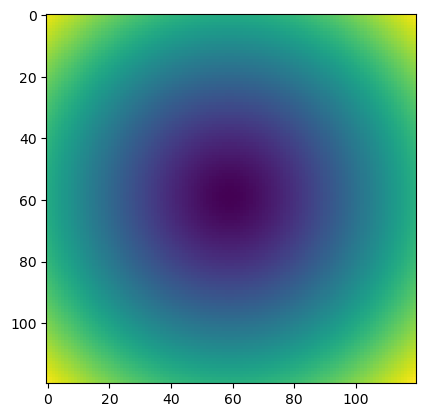

In [188]:
plt.imshow(D[60, 60])


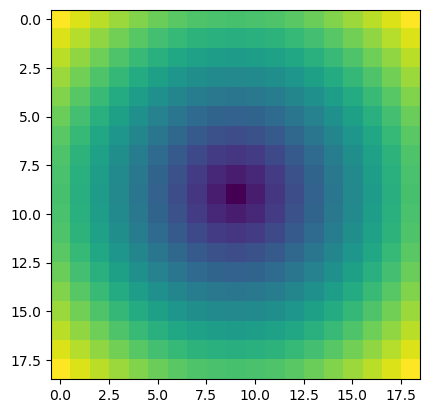

In [134]:
x, y = np.mgrid[-2 : 2 : 1j * (2 * N - 1), -2 : 2 : 1j * (2 * N - 1)]
X = cdist([[0, 0]], np.vstack((x.flatten(), y.flatten())).T).reshape(
    2 * N - 1, 2 * N - 1
)
plt.imshow(X)


In [161]:
atmStat.set_params(theta=0)


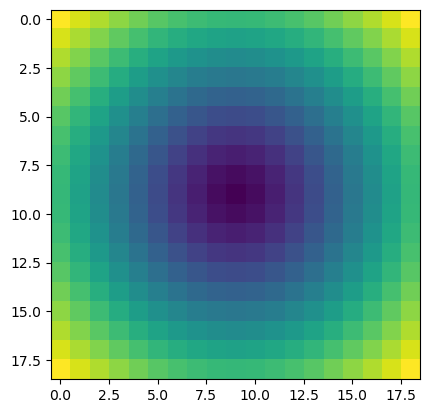

In [162]:
plt.imshow(atmStat.structure(X))


In [143]:
np.linspace(0, 1, 10)[..., None] + np.linspace(0, 1, 4)


array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.11111111, 0.44444444, 0.77777778, 1.11111111],
       [0.22222222, 0.55555556, 0.88888889, 1.22222222],
       [0.33333333, 0.66666667, 1.        , 1.33333333],
       [0.44444444, 0.77777778, 1.11111111, 1.44444444],
       [0.55555556, 0.88888889, 1.22222222, 1.55555556],
       [0.66666667, 1.        , 1.33333333, 1.66666667],
       [0.77777778, 1.11111111, 1.44444444, 1.77777778],
       [0.88888889, 1.22222222, 1.55555556, 1.88888889],
       [1.        , 1.33333333, 1.66666667, 2.        ]])

In [101]:
dx = xPupil[0, 1] - xPupil[0, 0]
np.sqrt(4**2 + 3**2) * dx
np.sqrt(4**2 + 4**2) * dx


1.2570787221094177

In [119]:
xs = 3
ys = 3
dx * np.sqrt(xs**2 + ys**2)


0.9428090415820632

In [97]:
d = cdist(
    [[1, 1]],
    np.vstack((xPupil[np.tril_indices(N, 0)], yPupil[np.tril_indices(N, 0)])).T,
).squeeze()
d.sort()

for i, di in enumerate(d):
    print(i, di)


0 0.0
1 0.22222222222222232
2 0.3142696805273546
3 0.44444444444444464
4 0.4969039949999535
5 0.6285393610547092
6 0.6666666666666667
7 0.7027283689263066
8 0.8012336167697756
9 0.8888888888888888
10 0.9162456945817024
11 0.9428090415820635
12 0.9938079899999066
13 1.1111111111111112
14 1.1111111111111112
15 1.1331154474650633
16 1.1967032904743344
17 1.2570787221094177
18 1.2957670877434002
19 1.3333333333333335
20 1.3517250067329378
21 1.4054567378526133
22 1.4229164972072998
23 1.49071198499986
24 1.5555555555555556
25 1.5713484026367723
26 1.5713484026367723
27 1.602467233539551
28 1.617802197617893
29 1.692394023525313
30 1.7356110390903678
31 1.7777777777777777
32 1.7916128329552332
33 1.7916128329552332
34 1.8324913891634047
35 1.885618083164127
36 1.8986674989594514
37 1.9116278371205837
38 1.987615979999813
39 2.0
40 2.0123078084749815
41 2.0487876571761974
42 2.0487876571761974
43 2.096440251568134
44 2.1081851067789197
45 2.188635067065801
46 2.199887763691481
47 2.222222222

In [96]:
d


array([[0.        , 0.22222222, 0.31426968, 0.44444444, 0.49690399,
        0.62853936, 0.66666667, 0.70272837, 0.80123362, 0.88888889,
        0.91624569, 0.94280904, 0.99380799, 1.11111111, 1.11111111,
        1.13311545, 1.19670329, 1.25707872, 1.29576709, 1.33333333,
        1.35172501, 1.40545674, 1.4229165 , 1.49071198, 1.55555556,
        1.5713484 , 1.5713484 , 1.60246723, 1.6178022 , 1.69239402,
        1.73561104, 1.77777778, 1.79161283, 1.79161283, 1.83249139,
        1.88561808, 1.8986675 , 1.91162784, 1.98761598, 2.        ,
        2.01230781, 2.04878766, 2.04878766, 2.09644025, 2.10818511,
        2.18863507, 2.19988776, 2.22222222, 2.28791781, 2.36225463,
        2.40370085, 2.51415744, 2.53372317, 2.67590991, 2.82842712]])

In [94]:
d


array([[0.        , 0.22222222, 0.31426968, 0.44444444, 0.49690399,
        0.62853936, 0.66666667, 0.70272837, 0.80123362, 0.88888889,
        0.91624569, 0.94280904, 0.99380799, 1.11111111, 1.11111111,
        1.13311545, 1.19670329, 1.25707872, 1.29576709, 1.33333333,
        1.35172501, 1.40545674, 1.4229165 , 1.49071198, 1.55555556,
        1.5713484 , 1.5713484 , 1.60246723, 1.6178022 , 1.69239402,
        1.73561104, 1.77777778, 1.79161283, 1.79161283, 1.83249139,
        1.88561808, 1.8986675 , 1.91162784, 1.98761598, 2.        ,
        2.01230781, 2.04878766, 2.04878766, 2.09644025, 2.10818511,
        2.18863507, 2.19988776, 2.22222222, 2.28791781, 2.36225463,
        2.40370085, 2.51415744, 2.53372317, 2.67590991, 2.82842712]])

In [87]:
d


array([0.        , 0.22222222, 0.31426968, 0.44444444, 0.49690399,
       0.62853936, 0.66666667, 0.70272837, 0.80123362, 0.88888889,
       0.91624569, 0.94280904, 0.99380799, 1.11111111, 1.13311545,
       1.19670329, 1.25707872, 1.29576709, 1.33333333, 1.35172501,
       1.40545674, 1.4229165 , 1.49071198, 1.55555556, 1.5713484 ,
       1.60246723, 1.6178022 , 1.69239402, 1.73561104, 1.77777778,
       1.79161283, 1.83249139, 1.88561808, 1.8986675 , 1.91162784,
       1.98761598, 2.        , 2.01230781, 2.04878766, 2.09644025,
       2.10818511, 2.18863507, 2.19988776, 2.22222222, 2.28791781,
       2.36225463, 2.40370085, 2.51415744, 2.53372317, 2.67590991,
       2.82842712])

In [42]:
points = np.vstack((xPupil[np.tril_indices(N, 0)], yPupil[np.tril_indices(N, 0)])).T
np.unique(cdist(points, points))


array([0.        , 0.22222222, 0.22222222, 0.22222222, 0.31426968,
       0.31426968, 0.31426968, 0.31426968, 0.31426968, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.49690399, 0.49690399,
       0.49690399, 0.49690399, 0.49690399, 0.49690399, 0.49690399,
       0.49690399, 0.49690399, 0.49690399, 0.62853936, 0.62853936,
       0.62853936, 0.62853936, 0.62853936, 0.62853936, 0.66666667,
       0.66666667, 0.66666667, 0.70272837, 0.70272837, 0.70272837,
       0.70272837, 0.80123362, 0.80123362, 0.80123362, 0.80123362,
       0.80123362, 0.88888889, 0.88888889, 0.88888889, 0.91624569,
       0.91624569, 0.94280904, 0.94280904, 0.94280904, 0.94280904,
       0.99380799, 0.99380799, 0.99380799, 0.99380799, 0.99380799,
       1.11111111, 1.11111111, 1.13311545, 1.13311545, 1.19670329,
       1.19670329, 1.19670329, 1.25707872, 1.25707872, 1.25707872,
       1.29576709, 1.29576709, 1.33333333, 1.33333333, 1.33333333,
       1.35172501, 1.35172501, 1.35172501, 1.40545674, 1.40545

In [51]:
u = np.unique(cdist(points, points))
u


array([0.        , 0.22222222, 0.22222222, 0.22222222, 0.31426968,
       0.31426968, 0.31426968, 0.31426968, 0.31426968, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.49690399, 0.49690399,
       0.49690399, 0.49690399, 0.49690399, 0.49690399, 0.49690399,
       0.49690399, 0.49690399, 0.49690399, 0.62853936, 0.62853936,
       0.62853936, 0.62853936, 0.62853936, 0.62853936, 0.66666667,
       0.66666667, 0.66666667, 0.70272837, 0.70272837, 0.70272837,
       0.70272837, 0.80123362, 0.80123362, 0.80123362, 0.80123362,
       0.80123362, 0.88888889, 0.88888889, 0.88888889, 0.91624569,
       0.91624569, 0.94280904, 0.94280904, 0.94280904, 0.94280904,
       0.99380799, 0.99380799, 0.99380799, 0.99380799, 0.99380799,
       1.11111111, 1.11111111, 1.13311545, 1.13311545, 1.19670329,
       1.19670329, 1.19670329, 1.25707872, 1.25707872, 1.25707872,
       1.29576709, 1.29576709, 1.33333333, 1.33333333, 1.33333333,
       1.35172501, 1.35172501, 1.35172501, 1.40545674, 1.40545

In [57]:
(np.unique(np.floor(cdist(points, points) * 1e)) / 1e16).size

120

In [52]:
u[1], u[2]


(0.2222222222222221, 0.2222222222222222)

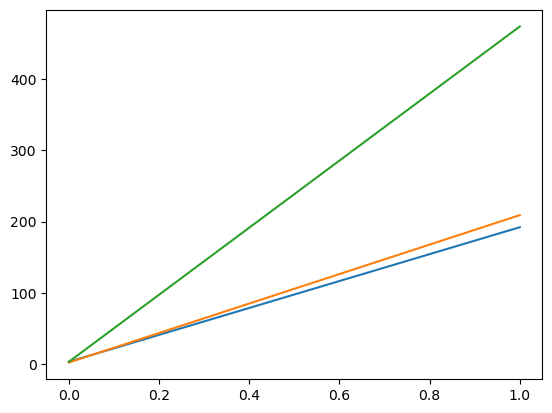

In [73]:
plt.plot(a)
plt.plot(b)
plt.plot(c)


In [66]:
points = np.vstack([xPupil.flatten(), yPupil.flatten()]).T
np.unique(cdist(points, points)).size


73

In [67]:
rho_unique.size


35

In [68]:
rho_idx.max()


35

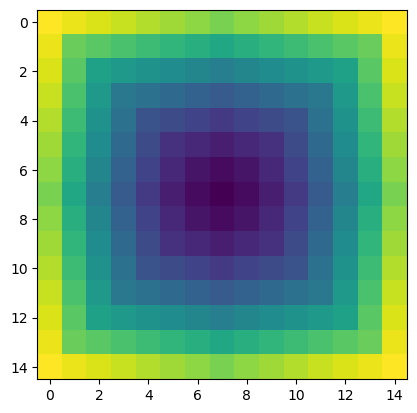

In [64]:
plt.imshow(X)


In [45]:
b


[2, 5, 9, 14, 20, 27, 35, 44, 54]

In [15]:
import numpy as np
import galsim
from scipy.spatial.distance import cdist


In [14]:
%%timeit

N = 125
jmax = 28
eps = 0.61

# create the pupil grid
yPupil, xPupil = np.mgrid[-1 : 1 : 1j * N, -1 : 1 : 1j * N]

# create the Zernike basis
zk = galsim.zernike.zernikeBasis(
    jmax,
    xPupil,
    yPupil,
    R_inner=eps,
)[4:]

# mask outside the pupil
rPupil = np.sqrt(xPupil**2 + yPupil**2)
zk *= (rPupil >= eps) & (rPupil <= 1)

# normalize Zernikes to unity

zk /= np.diag(np.einsum("jab,kab->jk", zk, zk))[:, None, None]
zk = zk

62.3 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit atmStat.zk_cov()

298 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit atmStat.zk_cov()

1.83 s ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit atmStat.zk_cov()

1.89 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
(293e-3) / 1.83


0.16010928961748633

In [22]:
1.83 - 293e-3


1.5370000000000001

In [ ]:
x, y = np.mgrid[-2 : 2 : 1j * (2 * N - 1), -2 : 2 : 1j * (2 * N - 1)]

# calculate distance from center of grid
rho = cdist([[0, 0]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape)
rho *= self.params["D"] / 2  # scale by mirror radius

# calculate structure function on this grid
Dphi = self.structure(rho)

# Create a sliding window over the gridded structure function.
# The result is an (N x N x N x N) tensor, which contains the
# structure function between every pair of points on the pupil
Dphi = np.lib.stride_tricks.sliding_window_view(Dphi, (N, N))

# trace over the pixels and calculate covariance
cov = -np.einsum(
    "jab,kcd,abcd->jk",
    self._zk,
    self._zk,
    Dphi,
    optimize="optimal",
) / (2 * self.N)


In [29]:
from lsst.ts.wep.cwfs.instrument import Instrument
from lsst.ts.wep.utility import CamType

import numpy as np
import galsim
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt


In [30]:
inst = Instrument()
inst.configFromFile(
    dimOfDonutImgOnSensor=125,
    camType=CamType["LsstCam"],
)


In [31]:
xSensor, ySensor = inst.getSensorCoor()


In [32]:
dOmega = (inst.apertureDiameter * inst.getSensorFactor() / inst.dimOfDonutImg) ** 2

R = inst.apertureDiameter / 2

eps = inst.obscuration

area = np.pi * R**2 * (1 - eps**2)


In [35]:
inst.getSensorFactor()


1.0279106858054228

In [28]:
dOmega


0.004726104177777778

In [34]:
(xSensor[0][1] - xSensor[0][0]) ** 2 * R


0.0011306469324827146

In [31]:
ySensor[1][0] - ySensor[0][0]


0.01644657097288671

In [42]:
zk = galsim.zernike.zernikeBasis(
    28,
    xSensor,
    ySensor,
    R_inner=eps,
)[4:]
rPupil = np.sqrt(xSensor**2 + ySensor**2)
zk *= (rPupil >= eps) & (rPupil <= 1)

np.diag(np.einsum("jab,kab->jk", zk, zk))[:, None, None].flatten() * dOmega / area


array([0.98989925, 0.9904545 , 0.99384543, 0.98789937, 0.98789937,
       0.98973708, 0.98973708, 0.98343636, 0.98910979, 0.98266494,
       0.98075969, 0.99376719, 0.98136705, 0.98136705, 0.98381095,
       0.98381095, 0.98475791, 0.98475791, 0.9775242 , 0.97462016,
       0.98407611, 0.99229543, 0.97098722, 0.98506958, 0.97940459])

In [36]:
area / dOmega


7292.7215001984305

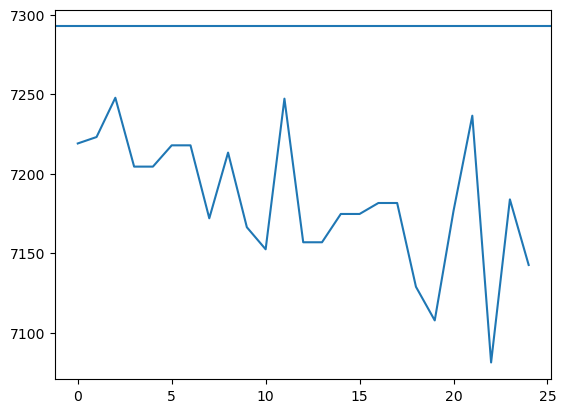

In [40]:
plt.plot(np.diag(np.einsum("jab,kab->jk", zk, zk))[:, None, None].flatten())
plt.axhline(area / dOmega)


In [1]:
%load_ext autoreload
%autoreload 2

from utils.atm_stat import AtmStat
from utils.zkAtmCov import ZkAtmCov
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [20]:
%timeit np.diag(AtmStat(pupil_N=125).zk_cov())

ValueError: Input must be 1- or 2-d.

In [85]:
zkAtmCov = ZkAtmCov()


In [18]:
d1 = zkAtmCov.cov
d2 = AtmStat(pupil_N=122).zk_cov()


In [22]:
d1[0, 0]


array([[  0.        ,   1.49514875,   4.44684637, ..., 821.38619546,
        825.6614065 , 829.88875293],
       [  1.49514875,   2.58470751,   5.28934423, ..., 821.40425893,
        825.67911915, 829.90612229],
       [  4.44684637,   5.28934423,   7.60660018, ..., 821.4584404 ,
        825.73224842, 829.95822193],
       ...,
       [821.38619546, 821.40425893, 821.4584404 , ..., 982.77397333,
        984.47089615, 986.16011624],
       [825.6614065 , 825.67911915, 825.73224842, ..., 984.47089615,
        986.14618725, 987.81398075],
       [829.88875293, 829.90612229, 829.95822193, ..., 986.16011624,
        987.81398075, 989.46054858]])

In [21]:
d2[-1, -1]


array([[   0.        ,    1.53936926,    4.57772945, ...,  841.61676485,
         845.9761118 ,  850.28633586],
       [   1.53936926,    2.66098411,    5.44487469, ...,  841.63518448,
         845.99417236,  850.30404509],
       [   4.57772945,    5.44487469,    7.82976957, ...,  841.69043422,
         846.04834518,  850.35716417],
       ...,
       [ 841.61676485,  841.63518448,  841.69043422, ..., 1005.91868097,
        1007.64279495, 1009.35899397],
       [ 845.9761118 ,  845.99417236,  846.04834518, ..., 1007.64279495,
        1009.34484289, 1011.0391862 ],
       [ 850.28633586,  850.30404509,  850.35716417, ..., 1009.35899397,
        1011.0391862 , 1012.71187978]])

In [11]:
atmStat.Dphi1 = d1.copy()


In [25]:
atmStat = AtmStat(pupil_N=122)
atmStat.Dphi1 = d1.copy()
np.diag(atmStat.zk_cov())


array([1.18364350e-03, 5.91827083e-03, 5.93854950e-03, 7.58613035e-04,
       7.58613035e-04, 2.04151653e-03, 2.04151653e-03, 6.18797857e-05,
       4.91727501e-04, 4.65489876e-04, 8.84048136e-04, 8.79768049e-04,
       6.34125592e-05, 6.34125592e-05, 3.08950258e-04, 3.08950258e-04,
       4.46679347e-04, 4.46679347e-04, 1.78956527e-06])

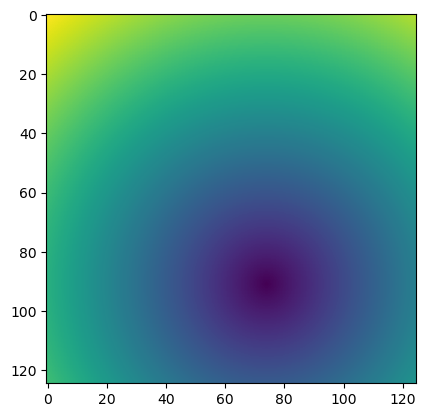

In [37]:
plt.imshow(dp[33, 50])


In [78]:
atmStat = AtmStat(pupil_N=122)


In [65]:
atmStat.structure = zkAtmCov.vonKarman


In [79]:
np.diag(atmStat.zk_cov())


array([ 1.21577456e-03,  6.08129766e-03,  6.10215748e-03, -7.80375106e-04,
       -7.80375106e-04, -2.10039467e-03, -2.10039467e-03,  6.37182099e-05,
        5.06130087e-04,  4.79139530e-04,  9.10011768e-04,  9.05592784e-04,
       -6.52888704e-05, -6.52888704e-05, -3.18083804e-04, -3.18083804e-04,
       -4.59892689e-04, -4.59892689e-04,  1.88464318e-06])

In [72]:
zkAtmCov._drho_unique


array([ 0.        ,  0.06874667,  0.06874667, ..., 11.66710129,
       11.71540829, 11.76391867])

In [84]:
np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[-1, -1]


array([[ 0.        ,  0.06909091,  0.13818182, ...,  8.22181818,
         8.29090909,  8.36      ],
       [ 0.06909091,  0.0977093 ,  0.15449197, ...,  8.22210847,
         8.29119696,  8.36028549],
       [ 0.13818182,  0.15449197,  0.1954186 , ...,  8.22297929,
         8.29206053,  8.36114192],
       ...,
       [ 8.22181818,  8.22210847,  8.22297929, ..., 11.62740678,
        11.67636364, 11.7255232 ],
       [ 8.29090909,  8.29119696,  8.29206053, ..., 11.67636364,
        11.72511608, 11.77407209],
       [ 8.36      ,  8.36028549,  8.36114192, ..., 11.7255232 ,
        11.77407209, 11.82282538]])

In [86]:
zkAtmCov._drho[0, 0]


array([[ 0.        ,  0.06874667,  0.13749333, ...,  8.18085333,
         8.2496    ,  8.31834667],
       [ 0.06874667,  0.09722247,  0.15372222, ...,  8.18114218,
         8.24988644,  8.31863074],
       [ 0.13749333,  0.15372222,  0.19444494, ...,  8.18200866,
         8.2507457 ,  8.3194829 ],
       ...,
       [ 8.18085333,  8.18114218,  8.18200866, ..., 11.56947374,
        11.61818667, 11.66710129],
       [ 8.2496    ,  8.24988644,  8.2507457 , ..., 11.61818667,
        11.6666962 , 11.71540829],
       [ 8.31834667,  8.31863074,  8.3194829 , ..., 11.66710129,
        11.71540829, 11.76391867]])

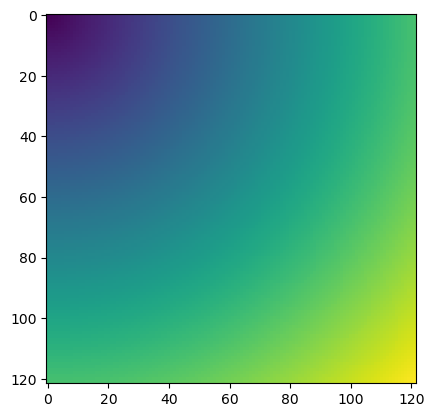

In [87]:
plt.imshow(zkAtmCov._drho[0, 0])


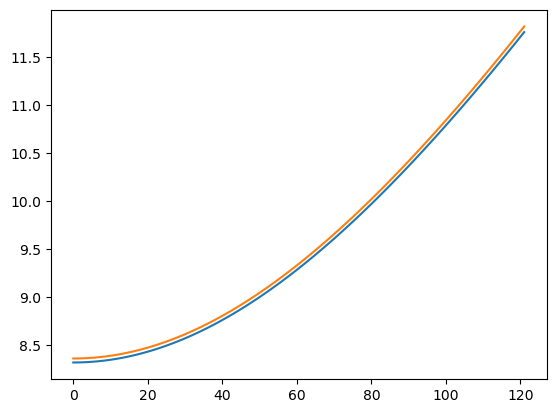

In [106]:
plt.plot(zkAtmCov._drho[0, 0][-1])
plt.plot(np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[-1, -1][-1])


In [109]:
zkAtmCov._drho[0, 0][0]


array([0.        , 0.06874667, 0.13749333, 0.20624   , 0.27498667,
       0.34373333, 0.41248   , 0.48122667, 0.54997333, 0.61872   ,
       0.68746667, 0.75621333, 0.82496   , 0.89370667, 0.96245333,
       1.0312    , 1.09994667, 1.16869333, 1.23744   , 1.30618667,
       1.37493333, 1.44368   , 1.51242667, 1.58117333, 1.64992   ,
       1.71866667, 1.78741333, 1.85616   , 1.92490667, 1.99365333,
       2.0624    , 2.13114667, 2.19989333, 2.26864   , 2.33738667,
       2.40613333, 2.47488   , 2.54362667, 2.61237333, 2.68112   ,
       2.74986667, 2.81861333, 2.88736   , 2.95610667, 3.02485333,
       3.0936    , 3.16234667, 3.23109333, 3.29984   , 3.36858667,
       3.43733333, 3.50608   , 3.57482667, 3.64357333, 3.71232   ,
       3.78106667, 3.84981333, 3.91856   , 3.98730667, 4.05605333,
       4.1248    , 4.19354667, 4.26229333, 4.33104   , 4.39978667,
       4.46853333, 4.53728   , 4.60602667, 4.67477333, 4.74352   ,
       4.81226667, 4.88101333, 4.94976   , 5.01850667, 5.08725

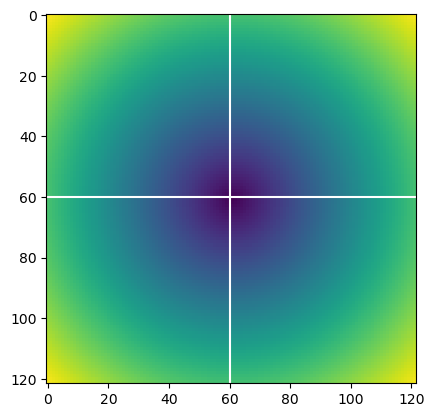

In [141]:
plt.imshow(np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[60, 60])
plt.axhline(60, c="w")
plt.axvline(60, c="w")


In [147]:
np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[60, 60].max()


5.960267341056062

In [149]:
np.sqrt(2) * R


5.911412690719537

In [139]:
maxlist = []
for i in range(122):
    maxlist.append(
        np.max(np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[i, i])
    )


In [144]:
np.argmin(maxlist)


60

In [146]:
maxlist[58:63]


[6.155685942402163,
 6.0579766417291125,
 5.960267341056062,
 5.960267341056063,
 6.057976641729113]

In [129]:
np.sqrt(6.351104543748263 / R)


1.2326406617083154

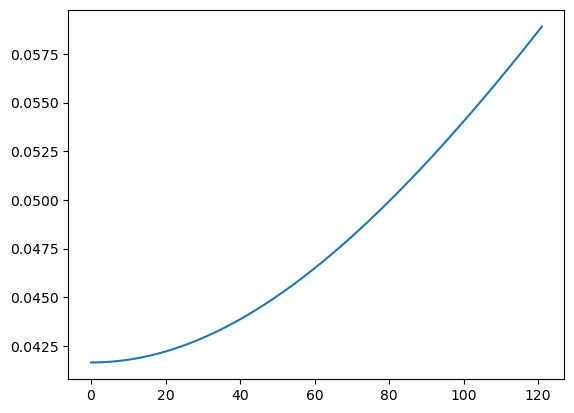

In [101]:
plt.plot(
    (
        np.lib.stride_tricks.sliding_window_view(atmStat._rho, (122, 122))[-1, -1]
        - zkAtmCov._drho[0, 0]
    )[-1]
)


In [4]:
dp


array([[[[1012.71187978, 1011.07974373, 1009.44046389, ...,
           850.35377897,  850.30319859,  850.28633586],
         [1011.07974373, 1009.4269976 , 1007.76691631, ...,
           846.14971784,  846.09815861,  846.08096952],
         [1009.44046389, 1007.76691631, 1006.08583829, ...,
           841.89891999,  841.8463609 ,  841.82883845],
         ...,
         [ 850.35377897,  846.14971784,  841.89891999, ...,
             7.5399693 ,    5.24171696,    4.40633557],
         [ 850.30319859,  846.09815861,  841.8463609 , ...,
             5.24171696,    2.56040888,    1.4807288 ],
         [ 850.28633586,  846.08096952,  841.82883845, ...,
             4.40633557,    1.4807288 ,    0.        ]],

        [[1011.07974373, 1009.44046389, 1007.79418729, ...,
           850.30319859,  850.28633586,  850.30319859],
         [1009.4269976 , 1007.76691631, 1006.09964737, ...,
           846.09815861,  846.08096952,  846.09815861],
         [1007.76691631, 1006.08583829, 1004.39737773, .

In [38]:
zkAtmCov.vonKarman(1)


84.73251377593931

In [37]:
atmStat.structure(1)


86.55041311937816

In [52]:
N = 5
x1 = np.mgrid[-1 : 1 : 1j * N, -1 : 1 : 1j * N][1][0]
x1


array([-1. , -0.5,  0. ,  0.5,  1. ])

In [60]:
x2 = np.mgrid[-2 : 2 : 1j * (2 * N - 1), -2 : 2 : 1j * (2 * N - 1)][1][0]
x2 = cdist([[0]], x2.reshape(-1, 1)).reshape(x2.shape)
x2


array([2. , 1.5, 1. , 0.5, 0. , 0.5, 1. , 1.5, 2. ])

In [62]:
np.lib.stride_tricks.sliding_window_view(x2, (N,))


array([[2. , 1.5, 1. , 0.5, 0. ],
       [1.5, 1. , 0.5, 0. , 0.5],
       [1. , 0.5, 0. , 0.5, 1. ],
       [0.5, 0. , 0.5, 1. , 1.5],
       [0. , 0.5, 1. , 1.5, 2. ]])

In [162]:
atmStat = AtmStat(pupil_N=125)
atmStat.zk_cov()


In [164]:
atmStat._rho


array([[11.82282538, 11.7752492 , 11.72786759, ..., 11.72786759,
        11.7752492 , 11.82282538],
       [11.7752492 , 11.72748002, 11.67990462, ..., 11.67990462,
        11.72748002, 11.7752492 ],
       [11.72786759, 11.67990462, 11.63213465, ..., 11.63213465,
        11.67990462, 11.72786759],
       ...,
       [11.72786759, 11.67990462, 11.63213465, ..., 11.63213465,
        11.67990462, 11.72786759],
       [11.7752492 , 11.72748002, 11.67990462, ..., 11.67990462,
        11.72748002, 11.7752492 ],
       [11.82282538, 11.7752492 , 11.72786759, ..., 11.72786759,
        11.7752492 , 11.82282538]])

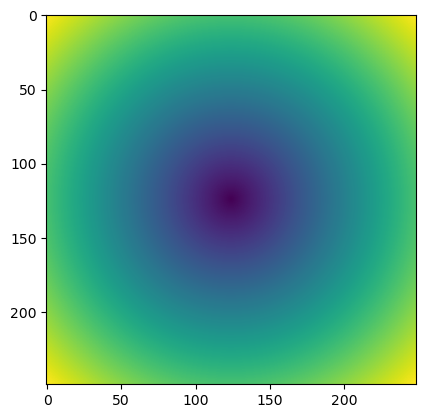

In [180]:
plt.imshow(atmStat._rho)


In [181]:
atmStat._rho.shape


(249, 249)

In [168]:
x, y = inst.getSensorCoor()


In [175]:
2 * x.max()


2.0393748006379586

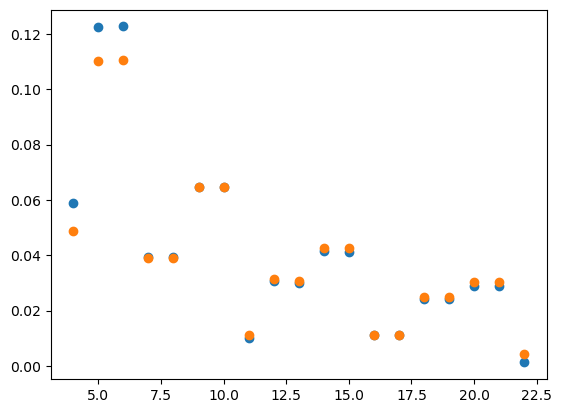

In [27]:
atmStat = AtmStat(L0=0)
plt.scatter(np.arange(4, 23), np.sqrt(np.abs(np.diag(atmStat.zk_cov()))))

atmStat = AtmStat(L0=30)
plt.scatter(np.arange(4, 23), np.sqrt(np.abs(np.diag(atmStat.zk_cov()))))


In [4]:
np.einsum(
    "jab,kcd,abcd->jk",
    atmStat._zk[:1],
    atmStat._zk[:1],
    atmStat._Bphi,
    optimize="optimal",
)


array([[-7.71310618]])

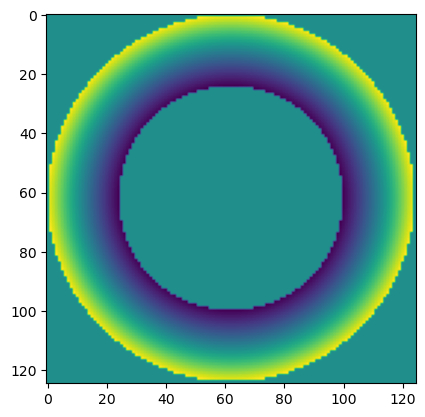

In [43]:
plt.imshow(atmStat._zk[0])


In [23]:
np.einsum("jab,kab->jk", atmStat._zk, atmStat._zk)


array([[ 7.53856485e+03,  2.49800181e-15, -1.82520665e-13,
        -1.18749455e-12, -5.90333338e-13,  3.98792110e-13,
        -1.19237953e-13, -5.90040710e+01,  6.12487838e-12,
         2.53685961e-14, -4.28589464e+01, -8.32667268e-15,
        -3.36233819e-12, -3.35598216e-12,  2.38808973e-13,
        -1.04360964e-13,  5.17363929e-14,  1.70974346e-13,
        -6.74032644e+01],
       [ 2.49800181e-15,  7.56459190e+03,  7.77156117e-15,
        -1.02362563e-12, -4.63025451e-13, -6.37490061e-13,
         1.27056698e-12,  1.67643677e-14, -1.26565425e-14,
        -1.07577253e+01,  5.11812814e-14,  1.99734673e-12,
         9.38277234e-14, -9.02167230e-13,  1.59178226e-12,
        -1.17073018e-12, -1.15463195e-13, -1.89293026e-13,
         1.93178806e-14],
       [-1.82520665e-13,  7.77156117e-15,  7.54067745e+03,
         2.99316127e-13, -8.77076189e-13, -3.85469434e-13,
        -8.17679258e-13,  3.99680289e-15, -7.29175428e+01,
         6.21724894e-15, -1.79944948e-12,  3.57491814e-14,
    

In [19]:
np.einsum("jab,kab->jk", atmStat._zk, atmStat._zk)


array([[ 1.32651243e-04,  7.36190745e-23,  1.09849585e-20,
        -1.33672387e-21, -1.03430664e-20,  2.58742096e-21,
        -1.02570396e-21, -1.04232069e-06,  6.77361660e-20,
         5.88952596e-22, -7.59503158e-07, -3.30872245e-23,
        -5.95503867e-20, -6.84111454e-20,  3.83150060e-21,
         4.11605073e-21,  1.63450889e-21, -1.52201233e-21,
        -1.19528464e-06],
       [ 7.36190745e-23,  1.32194838e-04,  5.59174094e-22,
        -1.73625211e-20, -1.37871363e-20, -1.24457595e-20,
         2.25787220e-20,  2.06795153e-22, -3.06056827e-22,
        -1.88854694e-07,  7.79204137e-22,  9.97786614e-21,
         5.31773736e-21, -1.49934758e-20,  2.73759560e-20,
        -2.06646261e-20, -6.41023616e-21, -1.05382810e-21,
         1.42275065e-22],
       [ 1.09849585e-20,  5.59174094e-22,  1.32614080e-04,
         1.80259199e-20, -1.55642304e-20, -2.06331932e-20,
        -1.50100194e-20, -1.12165691e-20, -1.28519862e-06,
         3.63959470e-23,  2.50801162e-20,  3.54033302e-22,
    

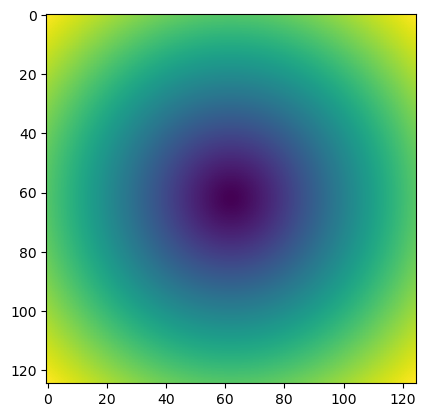

In [11]:
plt.imshow(atmStat._Bphi[62, 62])


In [9]:
atmStat._Bphi.shape


(125, 125, 125, 125)

In [10]:
125 / 2


62.5

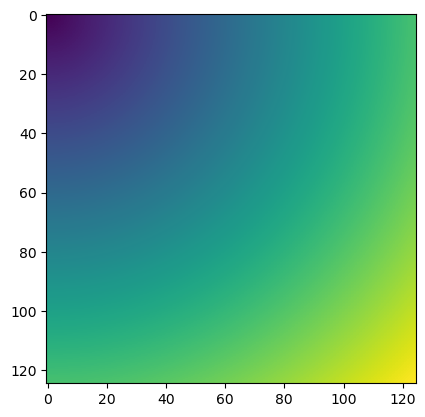

In [28]:
plt.imshow(atmStat._rho[-1, -1])


In [39]:
atmStat._rho[0, 0]


array([[11.82282538, 11.7752492 , 11.72786759, ...,  8.36108734,
         8.36027185,  8.36      ],
       [11.7752492 , 11.72748002, 11.67990462, ...,  8.29367682,
         8.2928547 ,  8.29258065],
       [11.72786759, 11.67990462, 11.63213465, ...,  8.22626645,
         8.22543759,  8.22516129],
       ...,
       [ 8.36108734,  8.29367682,  8.22626645, ...,  0.19069073,
         0.15075426,  0.13483871],
       [ 8.36027185,  8.2928547 ,  8.22543759, ...,  0.15075426,
         0.09534537,  0.06741935],
       [ 8.36      ,  8.29258065,  8.22516129, ...,  0.13483871,
         0.06741935,  0.        ]])

In [33]:
R = 8.36 / 2
N = 125
y, x = np.mgrid[-R : R : 1j * N, -R : R : 1j * N]


In [38]:
cdist([[R, R]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape)


array([[11.82282538, 11.7752492 , 11.72786759, ...,  8.36108734,
         8.36027185,  8.36      ],
       [11.7752492 , 11.72748002, 11.67990462, ...,  8.29367682,
         8.2928547 ,  8.29258065],
       [11.72786759, 11.67990462, 11.63213465, ...,  8.22626645,
         8.22543759,  8.22516129],
       ...,
       [ 8.36108734,  8.29367682,  8.22626645, ...,  0.19069073,
         0.15075426,  0.13483871],
       [ 8.36027185,  8.2928547 ,  8.22543759, ...,  0.15075426,
         0.09534537,  0.06741935],
       [ 8.36      ,  8.29258065,  8.22516129, ...,  0.13483871,
         0.06741935,  0.        ]])

In [41]:
np.allclose(
    atmStat._rho[-1, -1],
    cdist([[-R, -R]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape),
)


True

In [44]:
np.diag(atmStat.zk_cov())


array([-2.38854063e-03, -1.21542856e-02, -1.21952613e-02,  1.53708086e-03,
        1.53708086e-03,  4.19582763e-03,  4.19582763e-03, -1.24197403e-04,
       -9.99925081e-04, -9.47860655e-04, -1.82357421e-03, -1.80669163e-03,
        1.27909331e-04,  1.27909331e-04,  6.30177225e-04,  6.30177225e-04,
        9.17513087e-04,  9.17513087e-04, -1.61764322e-05])

In [46]:
np.diag(atmStat.zk_cov())


array([-2.38854063e-03, -1.21542856e-02, -1.21952613e-02,  1.53708086e-03,
        1.53708086e-03,  4.19582763e-03,  4.19582763e-03, -1.24197403e-04,
       -9.99925081e-04, -9.47860655e-04, -1.82357421e-03, -1.80669163e-03,
        1.27909331e-04,  1.27909331e-04,  6.30177225e-04,  6.30177225e-04,
        9.17513087e-04,  9.17513087e-04, -1.61764322e-05])

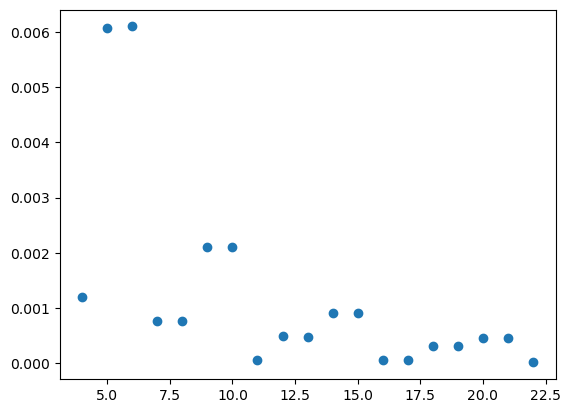

In [49]:
plt.scatter(np.arange(4, 23), np.abs(np.diag(atmStat.zk_cov())))


In [52]:
atmStat = AtmStat(L0=30, pupil_N=400)
np.diag(atmStat.zk_cov())


: 

In [ ]:
atmStat = AtmStat(L0=30, pupil_N=125)
np.diag(atmStat.zk_cov())


In [1]:
%load_ext autoreload
%autoreload 2

from utils.atm_stat import AtmStat
from utils.zkAtmCov import ZkAtmCov
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
atmStat = AtmStat(L0=30, pupil_N=125)
np.diag(atmStat.zk_cov())


array([ 8.47460911e-06,  3.96836471e-05,  3.98249538e-05, -5.77397372e-06,
       -5.77397372e-06, -1.52698044e-05, -1.52698044e-05,  6.98080916e-07,
        4.22706821e-06,  4.04177658e-06,  7.59508118e-06,  7.51910376e-06,
       -7.36439208e-07, -7.36439208e-07, -2.99605439e-06, -2.99605439e-06,
       -4.30392641e-06, -4.30392641e-06,  1.64026561e-07])

In [22]:
atmStat = AtmStat(L0=30, pupil_N=125)
np.diag(atmStat.zk_cov())


array([1.19805560e-03, 6.07714280e-03, 6.09763067e-03, 7.68540431e-04,
       7.68540431e-04, 2.09791382e-03, 2.09791382e-03, 6.78421122e-05,
       4.99962541e-04, 4.73930327e-04, 9.13885357e-04, 9.03345814e-04,
       6.39546656e-05, 6.39546656e-05, 3.15088612e-04, 3.15088612e-04,
       4.58756543e-04, 4.58756543e-04, 1.63804534e-05])

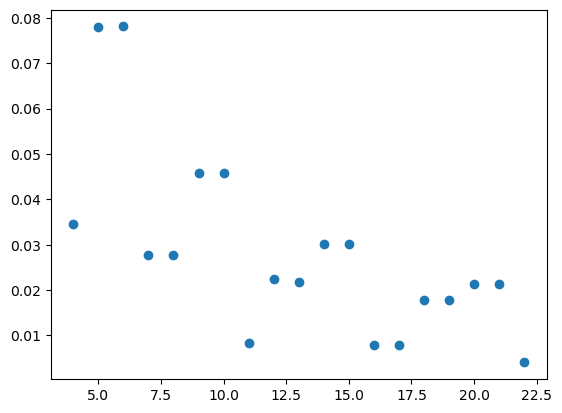

In [23]:
plt.scatter(np.arange(4, 23), np.sqrt(np.diag(atmStat.zk_cov())))


In [26]:
from lsst.ts.phosim.utils.ConvertZernikesToPsfWidth import convertZernikesToPsfWidth


In [27]:
np.sqrt(
    np.sum(np.square(convertZernikesToPsfWidth(np.sqrt(np.diag(atmStat.zk_cov())))))
)


0.08020679432683787

In [14]:
drho = atmStat._drho.copy()
drho[0, 4]


array([[ 0.26967742,  0.20225806,  0.13483871, ...,  7.95548387,
         8.02290323,  8.09032258],
       [ 0.27797712,  0.21319872,  0.15075426, ...,  7.95576954,
         8.0231865 ,  8.09060349],
       [ 0.30150852,  0.24308394,  0.19069073, ...,  7.95662649,
         8.02403624,  8.09144616],
       ...,
       [ 8.22958104,  8.22764769,  8.22626645, ..., 11.4430329 ,
        11.49000672, 11.53718327],
       [ 8.29696449,  8.29504684,  8.29367682, ..., 11.49158898,
        11.53836513, 11.58534476],
       [ 8.3643485 ,  8.36244631,  8.36108734, ..., 11.54033464,
        11.58691401, 11.63369758]])

In [15]:
rho = atmStat._rho.copy()
rho = rho[::-1, ::-1]
rho[0, 4]


array([[ 0.26967742,  0.20225806,  0.13483871, ...,  7.95548387,
         8.02290323,  8.09032258],
       [ 0.27797712,  0.21319872,  0.15075426, ...,  7.95576954,
         8.0231865 ,  8.09060349],
       [ 0.30150852,  0.24308394,  0.19069073, ...,  7.95662649,
         8.02403624,  8.09144616],
       ...,
       [ 8.22958104,  8.22764769,  8.22626645, ..., 11.4430329 ,
        11.49000672, 11.53718327],
       [ 8.29696449,  8.29504684,  8.29367682, ..., 11.49158898,
        11.53836513, 11.58534476],
       [ 8.3643485 ,  8.36244631,  8.36108734, ..., 11.54033464,
        11.58691401, 11.63369758]])

In [16]:
np.allclose(rho, drho)


True

In [20]:
rho[0, 0]


array([[ 0.        ,  0.06741935,  0.13483871, ...,  8.22516129,
         8.29258065,  8.36      ],
       [ 0.06741935,  0.09534537,  0.15075426, ...,  8.22543759,
         8.2928547 ,  8.36027185],
       [ 0.13483871,  0.15075426,  0.19069073, ...,  8.22626645,
         8.29367682,  8.36108734],
       ...,
       [ 8.22516129,  8.22543759,  8.22626645, ..., 11.63213465,
        11.67990462, 11.72786759],
       [ 8.29258065,  8.2928547 ,  8.29367682, ..., 11.67990462,
        11.72748002, 11.7752492 ],
       [ 8.36      ,  8.36027185,  8.36108734, ..., 11.72786759,
        11.7752492 , 11.82282538]])

In [21]:
rho[::-1, ::-1][-1, -1]


array([[ 0.        ,  0.06741935,  0.13483871, ...,  8.22516129,
         8.29258065,  8.36      ],
       [ 0.06741935,  0.09534537,  0.15075426, ...,  8.22543759,
         8.2928547 ,  8.36027185],
       [ 0.13483871,  0.15075426,  0.19069073, ...,  8.22626645,
         8.29367682,  8.36108734],
       ...,
       [ 8.22516129,  8.22543759,  8.22626645, ..., 11.63213465,
        11.67990462, 11.72786759],
       [ 8.29258065,  8.2928547 ,  8.29367682, ..., 11.67990462,
        11.72748002, 11.7752492 ],
       [ 8.36      ,  8.36027185,  8.36108734, ..., 11.72786759,
        11.7752492 , 11.82282538]])

In [37]:
N = 3
x, y = np.mgrid[-2 : 2 : 1j * (2 * N - 1), -2 : 2 : 1j * (2 * N - 1)]
r = cdist([[0, 0]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape)
r = np.lib.stride_tricks.sliding_window_view(r, (N, N))[::-1, ::-1]


In [42]:
r[1, 1]


array([[1.41421356, 1.        , 1.41421356],
       [1.        , 0.        , 1.        ],
       [1.41421356, 1.        , 1.41421356]])

In [31]:
rho = cdist([[0, 0]], np.vstack((x.flatten(), y.flatten())).T).reshape(x.shape)


array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]])

In [45]:
c = []
for L0 in np.linspace(0, 30)[1:]:
    atmStat.set_params(L0=L0)
    c.append(atmStat.correlation(1))


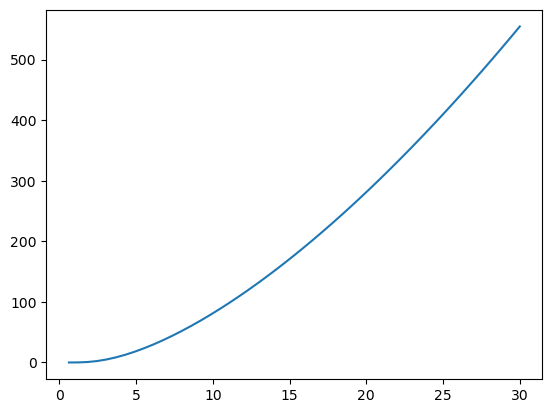

In [50]:
plt.plot(np.linspace(0, 30)[1:], c)


In [61]:
L = []
p = []
for L0 in np.linspace(0, 30, 1000):
    L.append(L0)
    atmStat.set_params(L0=L0)
    p.append(atmStat.psf_fwhm)


/astro/store/epyc/users/jfc20/aos/aos_notebooks/utils/atm_stat.py:231: RuntimeWarning: invalid value encountered in sqrt
  fwhm_rad *= np.sqrt(1 - 2.183 * (self.r0 / self.params["L0"]) ** 0.356)
/astro/store/epyc/users/jfc20/aos/aos_notebooks/utils/atm_stat.py:211: RuntimeWarning: invalid value encountered in power
  + 2.183 * (r0vk / self.params["L0"]) ** 0.356


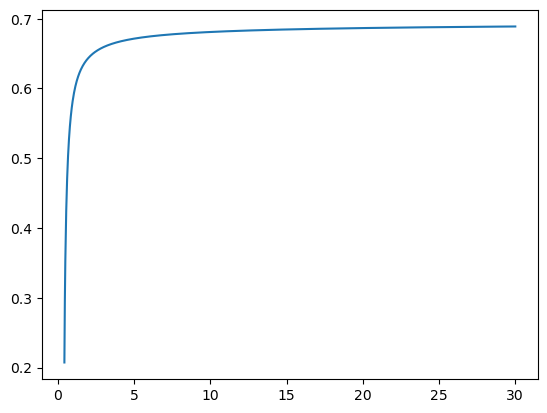

In [62]:
plt.plot(L, p)


In [56]:
atmStat.psf_fwhm


/astro/store/epyc/users/jfc20/aos/aos_notebooks/utils/atm_stat.py:231: RuntimeWarning: invalid value encountered in sqrt
  


nan

In [58]:
atmStat.zk_cov()


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [64]:
atmStat.set_params(zenith=0, L0=30)


In [83]:
atmStat = AtmStat(zenith=0, wavelength=500e-9, seeing_type="dimm")
atmStat.psf_fwhm


0.5479152931070909

In [86]:
np.diag(atmStat.zk_cov())


array([1.19068146e-03, 6.03973749e-03, 6.06009925e-03, 7.63810001e-04,
       7.63810001e-04, 2.08500098e-03, 2.08500098e-03, 6.74245384e-05,
       4.96885230e-04, 4.71013247e-04, 9.08260317e-04, 8.97785646e-04,
       6.35610194e-05, 6.35610194e-05, 3.13149216e-04, 3.13149216e-04,
       4.55932859e-04, 4.55932859e-04, 1.62796304e-05])

In [72]:
atmStat.params


{'seeing': 0.67,
 'zenith': 0,
 'wavelength': 5e-07,
 'L0': 30,
 'v': 10,
 'T': 15,
 'theta': 0,
 'Cn2': array([[2.00000000e-01, 2.58000000e+00, 5.16000000e+00, 7.73000000e+00,
         1.28900000e+01, 1.54600000e+01],
        [3.71516322e-04, 9.80073733e-05, 3.13395671e-05, 1.42452578e-05,
         4.21659630e-05, 1.25358268e-05]]),
 'D': 8.36,
 'eps': 0.61,
 'jmax': 22,
 'pupil_N': 125}

In [76]:
atmStat.r0_ref / atmStat.r0_ref


1.0

In [77]:
atmStat.psf_fwhm / atmStat.params["seeing"]


0.9999999999999796

In [110]:
atmStat = AtmStat(theta=1)
std1 = atmStat.zk_std()


In [111]:
atmStat = AtmStat(theta=1)
atmStat.set_params(
    Cn2=(
        h,
        y,
    )
)
std2 = atmStat.zk_std()


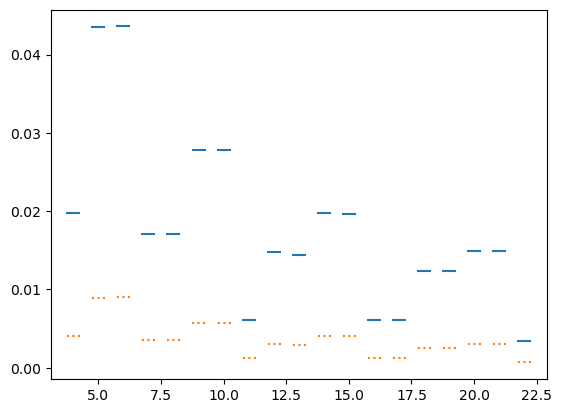

In [112]:
plt.scatter(np.arange(4, 23), std1, marker="_", s=100)
plt.scatter(np.arange(4, 23), std2, marker="_", s=100, ls=":")


In [109]:
atmStat.params


{'seeing': 0.67,
 'seeing_type': 'fwhm',
 'zenith': 30,
 'wavelength': 6.223195217611446e-07,
 'L0': 30,
 'v': 10,
 'T': 15,
 'theta': 0,
 'Cn2': array([[0.00000000e+00, 8.16326531e-03, 1.63265306e-02, 2.44897959e-02,
         3.26530612e-02, 4.08163265e-02, 4.89795918e-02, 5.71428571e-02,
         6.53061224e-02, 7.34693878e-02, 8.16326531e-02, 8.97959184e-02,
         9.79591837e-02, 1.06122449e-01, 1.14285714e-01, 1.22448980e-01,
         1.30612245e-01, 1.38775510e-01, 1.46938776e-01, 1.55102041e-01,
         1.63265306e-01, 1.71428571e-01, 1.79591837e-01, 1.87755102e-01,
         1.95918367e-01, 2.04081633e-01, 2.12244898e-01, 2.20408163e-01,
         2.28571429e-01, 2.36734694e-01, 2.44897959e-01, 2.53061224e-01,
         2.61224490e-01, 2.69387755e-01, 2.77551020e-01, 2.85714286e-01,
         2.93877551e-01, 3.02040816e-01, 3.10204082e-01, 3.18367347e-01,
         3.26530612e-01, 3.34693878e-01, 3.42857143e-01, 3.51020408e-01,
         3.59183673e-01, 3.67346939e-01, 3.75510204e

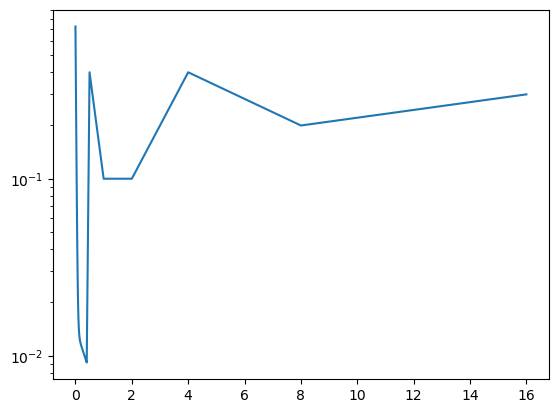

In [106]:
h = np.linspace(0, 400)
y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)

h /= 1e3
y *= 2.7 / y.sum()

h = np.append(h, [0.5, 1, 2, 4, 8, 16])
y = np.append(y, [0.4, 0.1, 0.1, 0.4, 0.2, 0.3])


plt.plot(h, y)
plt.yscale("log")
# plt.ylim(1e-1, 1e2)


In [ ]:
def cp_turbulence_profile(nlayers=10)

In [157]:
i = 20
h = np.linspace(0, 400, i)
y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)

h /= 1e3
y *= 2.7 / y.sum()

h = np.append(h, [0.5, 1, 2, 4, 8, 16])
y = np.append(y, [0.4, 0.1, 0.1, 0.4, 0.2, 0.3])

atmStat = AtmStat(theta=1)
atmStat.set_params(
    Cn2=(
        h,
        y,
    )
)
atmStat.zk_cov()


array([[ 2.43089290e-05,  3.48898739e-22,  5.60322515e-21,
         2.47475777e-20,  2.36711684e-20,  8.70501050e-21,
        -5.71781142e-22, -1.79814540e-06, -4.66935429e-22,
         2.34704888e-22, -7.46790914e-08,  8.08315303e-23,
        -1.72616083e-21, -1.16733857e-20,  3.10389668e-21,
        -2.93502270e-21,  3.62080432e-21,  4.16906633e-21,
        -4.86264348e-07],
       [-4.50259164e-22,  1.19015701e-04,  5.05499293e-22,
        -7.98376202e-21, -8.79256089e-21, -5.62186876e-21,
         5.25302358e-21, -9.78179861e-22, -8.76545246e-22,
        -2.03066889e-05, -2.78695572e-21,  3.56872078e-21,
         8.09632682e-21, -8.15722309e-21,  2.06618927e-20,
        -1.46120994e-20, -2.86831764e-21, -1.95854103e-21,
        -2.26125099e-22],
       [ 2.40138221e-21, -7.54601006e-22,  1.19455205e-04,
         2.66820245e-21, -7.93518555e-21, -4.29580595e-20,
        -5.67200305e-21, -8.27142760e-21, -2.17686510e-05,
         1.77280191e-21, -7.73778711e-21,  1.50534985e-21,
    

In [218]:
nl = []
stds = []

for i in range(2, 32, 2):
    h = np.linspace(30, 400, 10000)
    y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)
    norm = 2.7 / simps(y, h)

    h = np.linspace(30, 400, i)
    y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)

    h /= 1e3
    y *= norm

    h = np.append(h, [0.5, 1, 2, 4, 8, 16])
    y = np.append(y, [0.4, 0.1, 0.1, 0.4, 0.2, 0.3])

    atmStat = AtmStat(theta=2)
    atmStat.set_params(
        Cn2=(
            h,
            y,
        )
    )

    nl.append(i)
    stds.append(atmStat.zk_std())

stds = np.array(stds)


In [130]:
stds = np.array(stds)


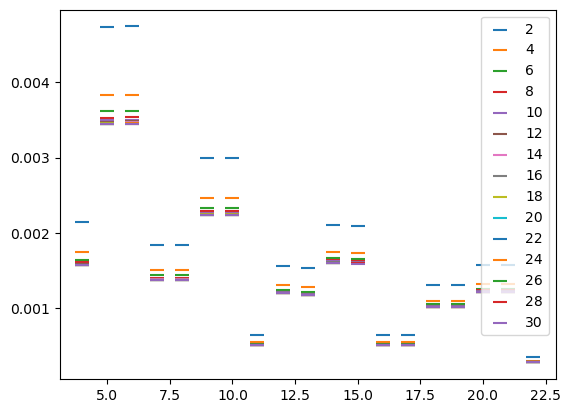

In [219]:
for i, std in zip(nl, stds):
    plt.scatter(np.arange(4, 23), std, marker="_", s=100, label=i)

plt.legend()


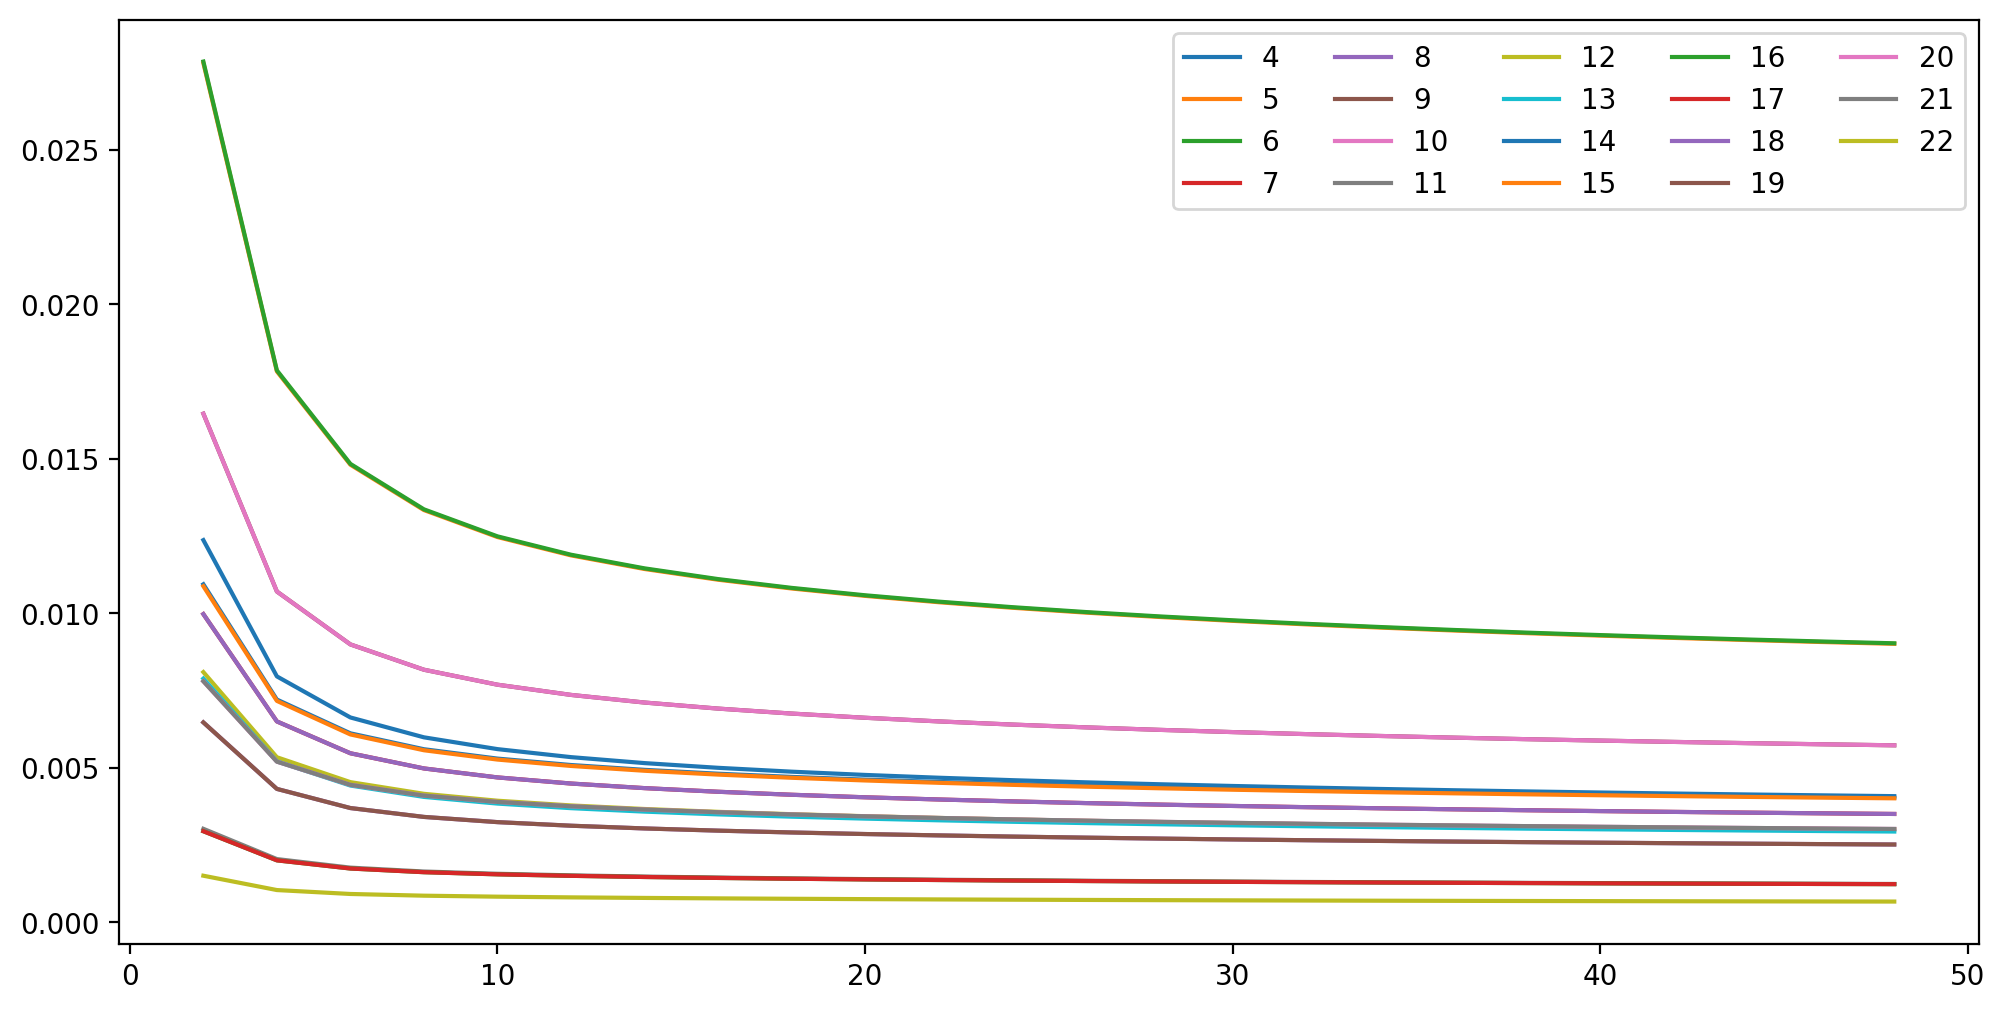

In [147]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
for i, s in enumerate(stds.T):
    ax.plot(nl, s, label=i + 4)
ax.legend(ncol=5)


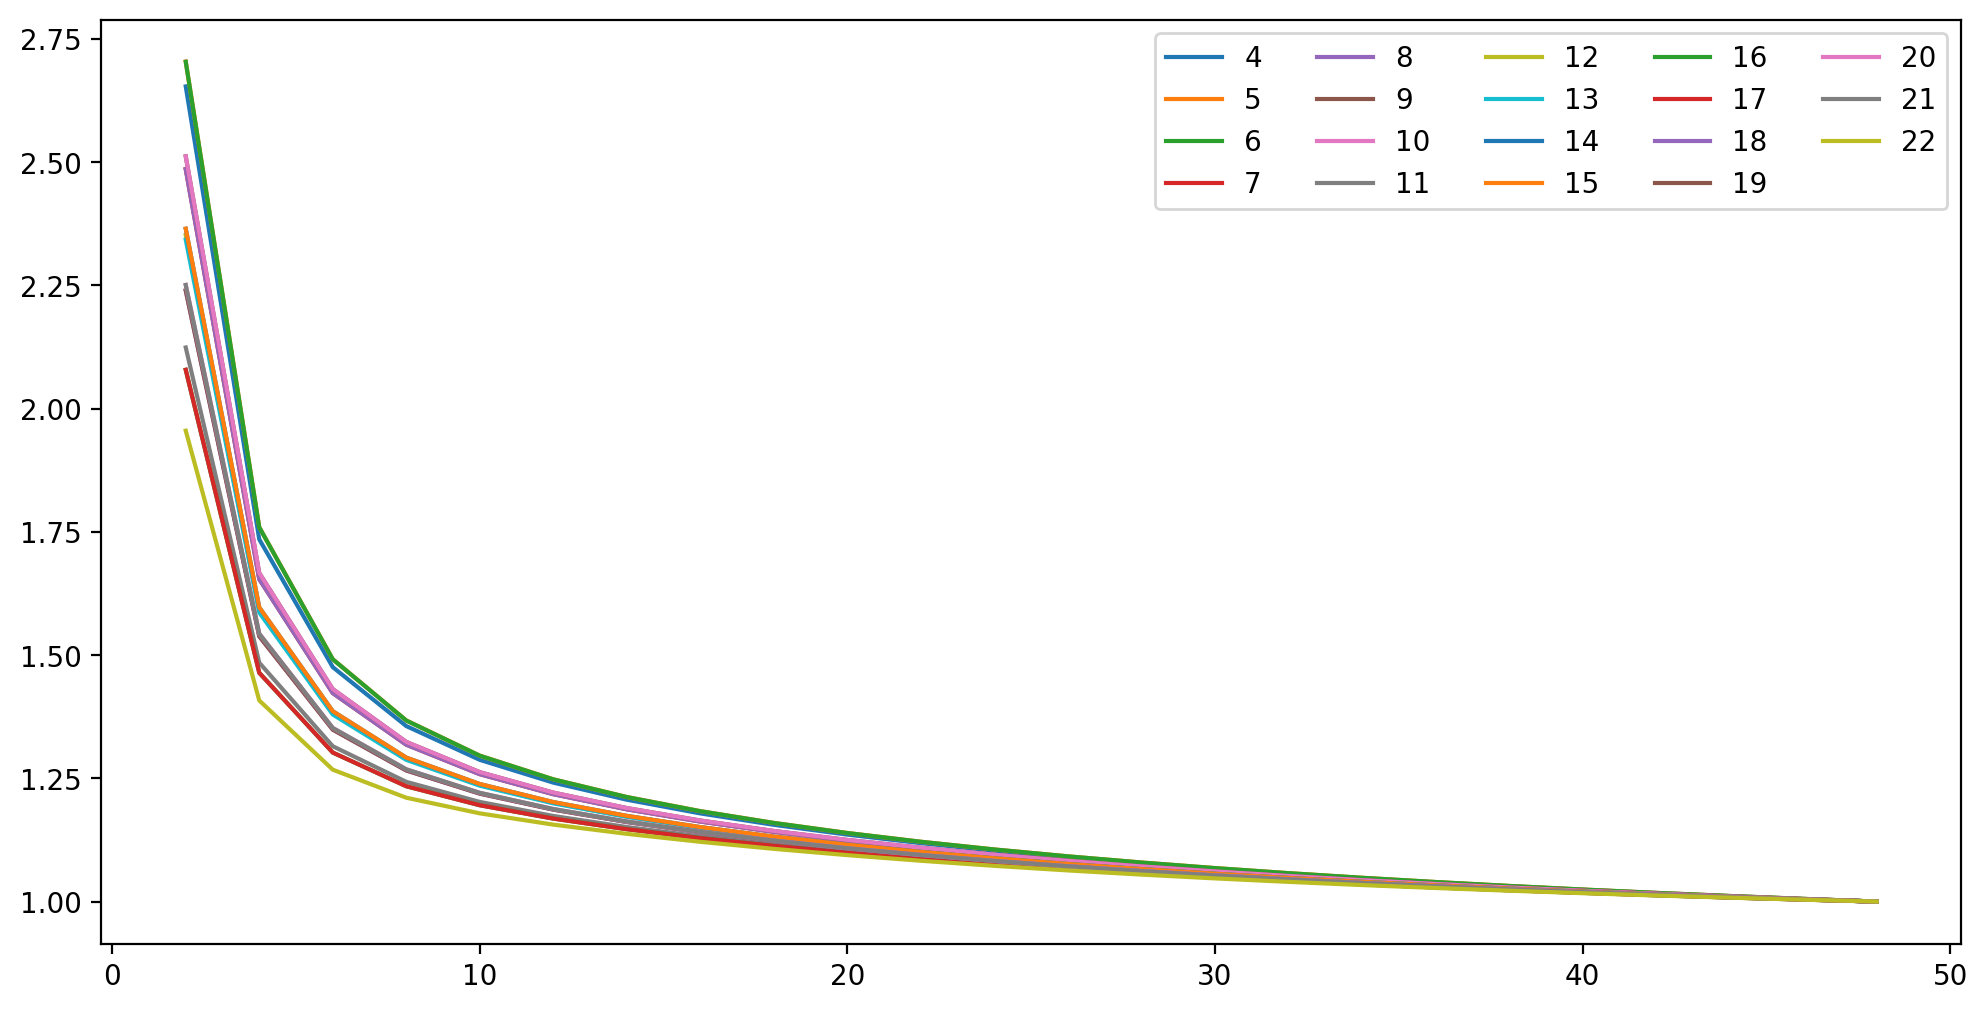

In [158]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
for i, s in enumerate(stds.T):
    ax.plot(nl, s / s[-1], label=i + 4)
ax.legend(ncol=5)


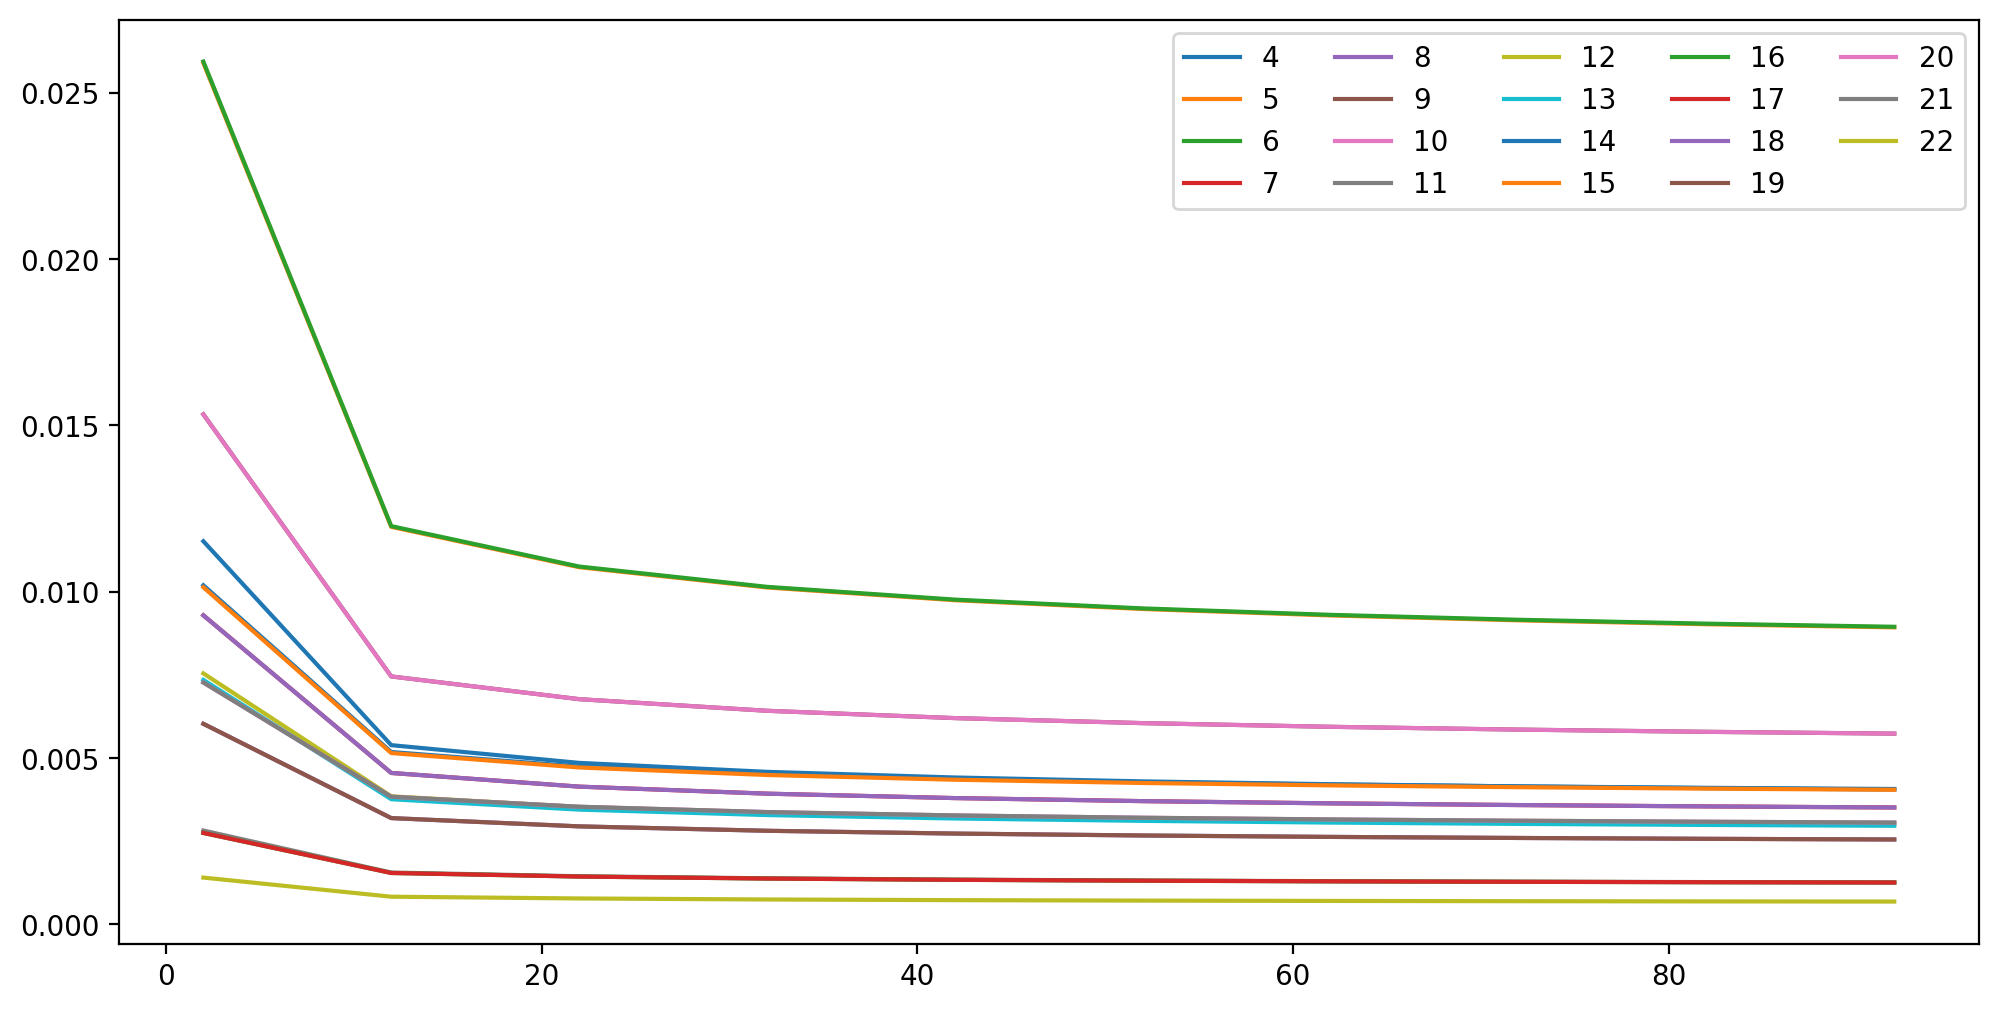

In [162]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
for i, s in enumerate(stds.T):
    ax.plot(nl, s, label=i + 4)
ax.legend(ncol=5)


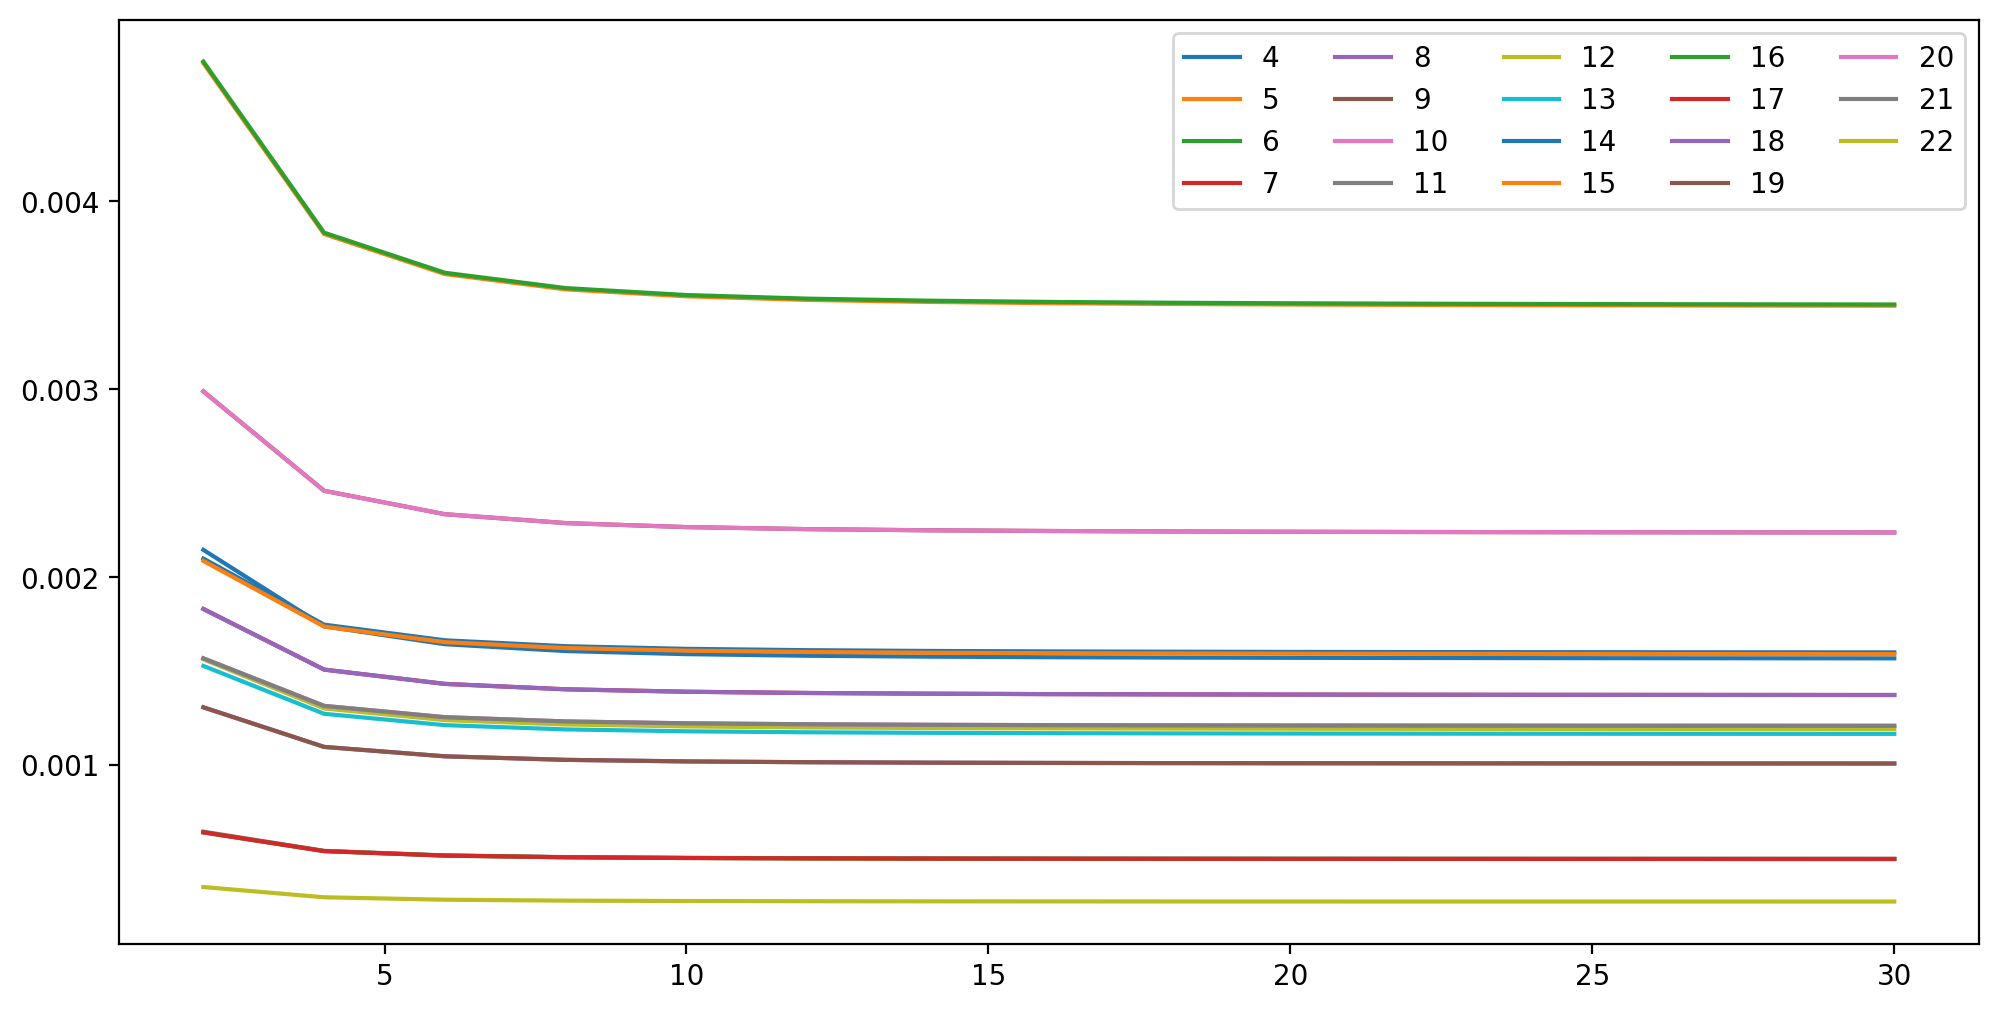

In [222]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
for i, s in enumerate(stds.T):
    ax.plot(nl, s, label=i + 4)

# ax.set(xlim=(0, 10))
ax.legend(ncol=5)


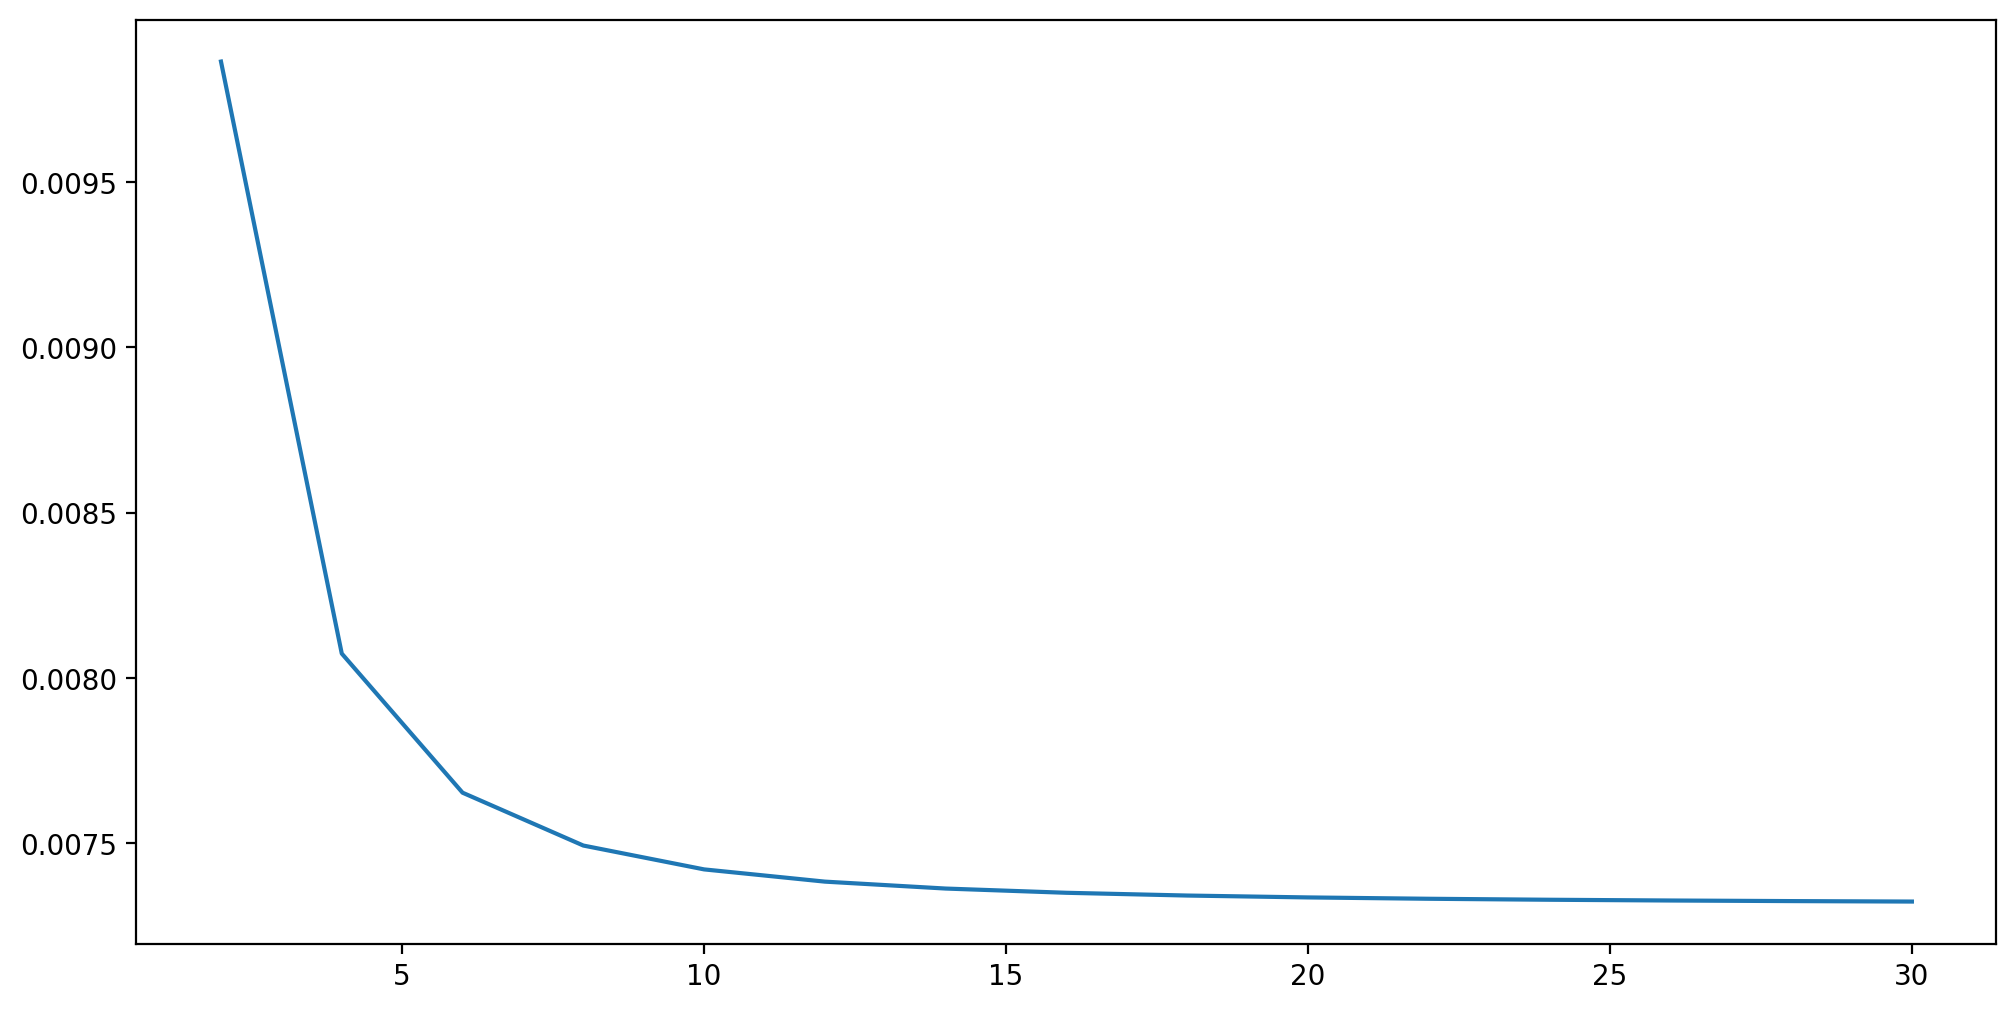

In [220]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

plt.plot(nl, np.sqrt(np.sum(np.square(stds), axis=1)))


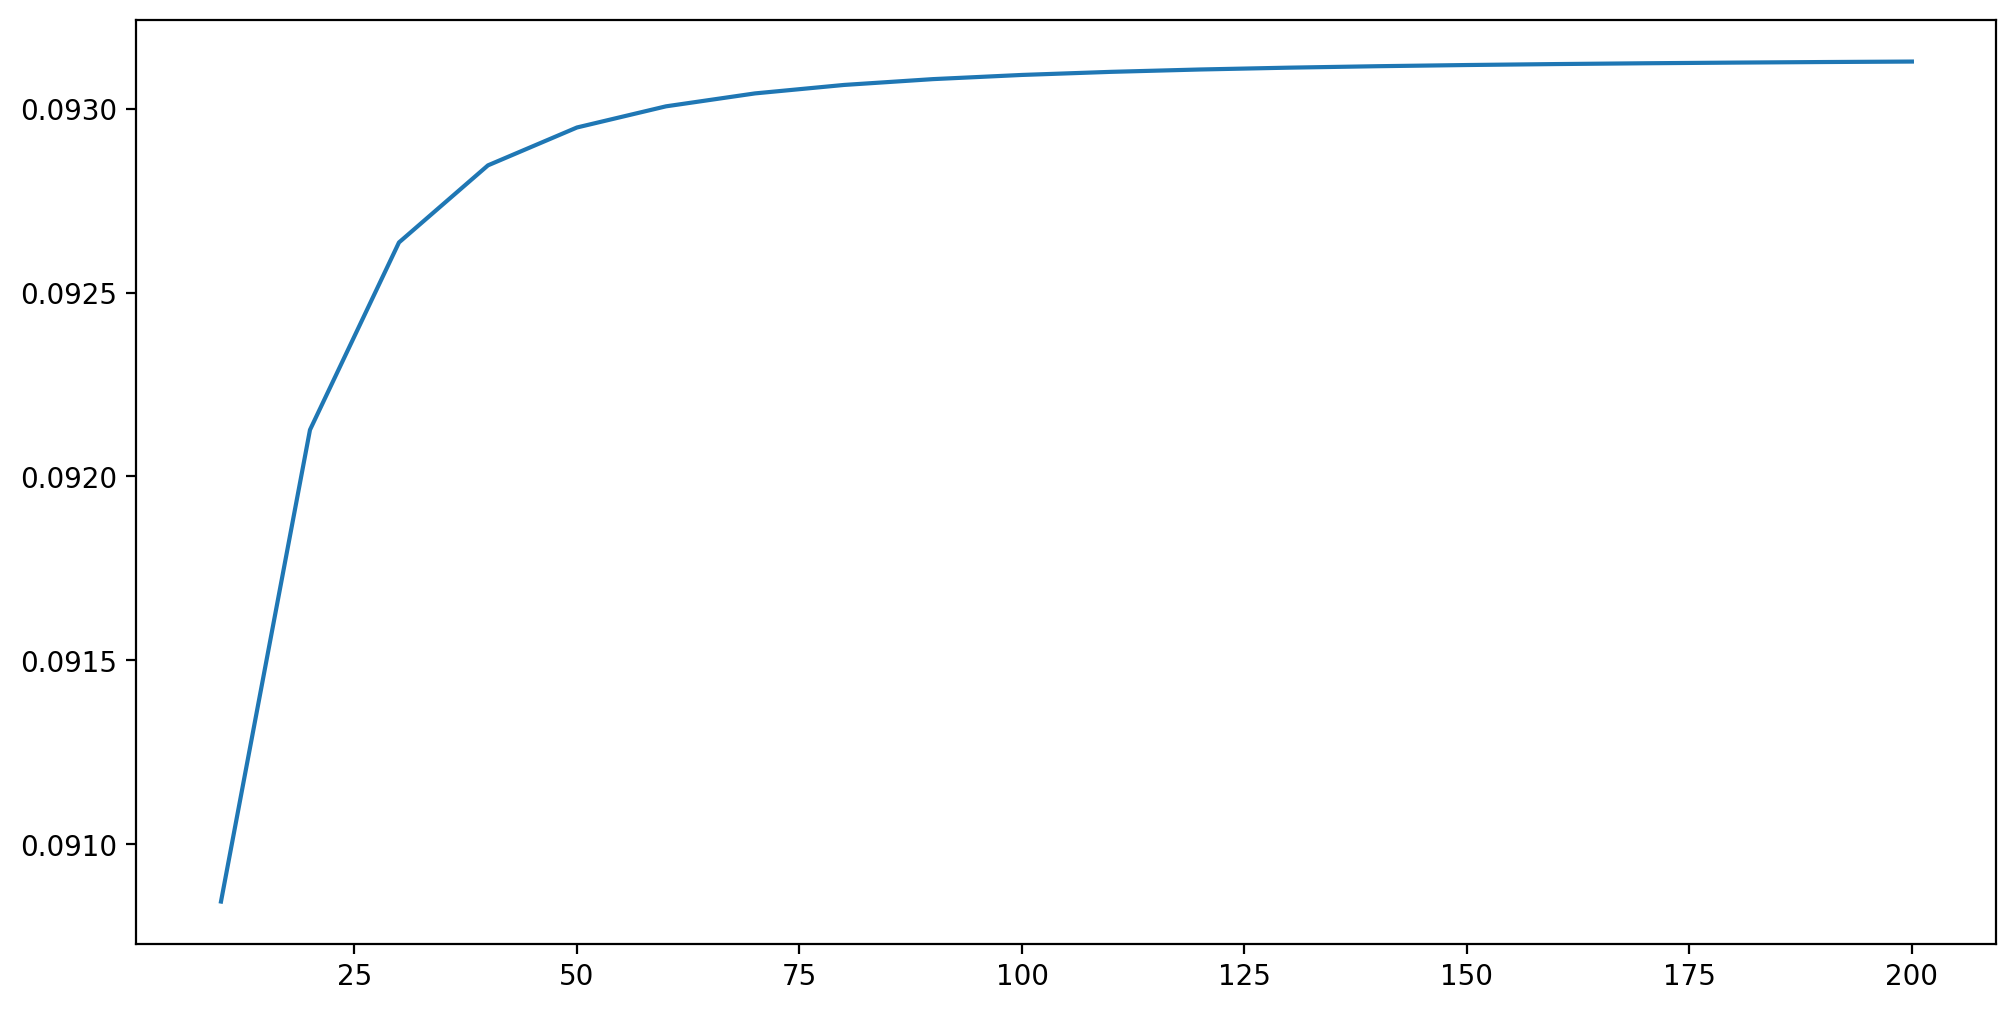

In [204]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

plt.plot(nl, np.sqrt(np.sum(np.square(stds), axis=1)))


In [186]:
i = 1000
h = np.linspace(6, 500, i)
y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)
y *= 2.7 / simps(y, h)

simps(y, h)


2.7

In [ ]:
dome height = 30m

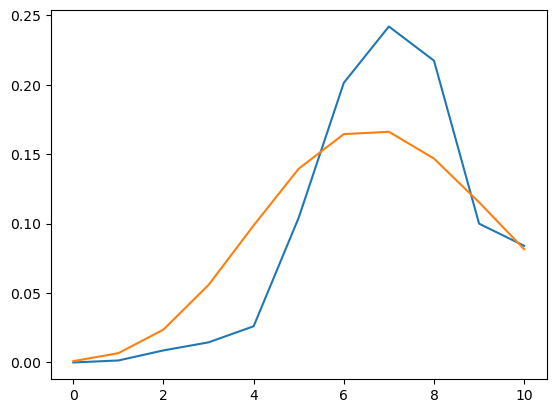

In [203]:
S = np.arange(11)
N = np.array([0, 1, 6, 10, 18, 72, 139, 167, 150, 69, 58])
L = np.sum(S * N) / np.sum(N)

p = L**S * np.exp(-L) / np.array([np.math.factorial(i) for i in S])
p /= p.sum()

plt.plot(S, N / N.sum())
plt.plot(S, p)


In [193]:
np.sum(S * N) / np.sum(N)


7.071014492753624

In [223]:
h = np.linspace(30, 400, 10000)
y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)
norm = 2.7 / simps(y, h)

h = np.linspace(30, 400, 10)
y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)

h /= 1e3
y *= norm

h = np.append(h, [0.5, 1, 2, 4, 8, 16])
y = np.append(y, [0.4, 0.1, 0.1, 0.4, 0.2, 0.3])


In [227]:
h


array([ 0.03      ,  0.07111111,  0.11222222,  0.15333333,  0.19444444,
        0.23555556,  0.27666667,  0.31777778,  0.35888889,  0.4       ,
        0.5       ,  1.        ,  2.        ,  4.        ,  8.        ,
       16.        ])

In [225]:
y


array([0.06336904, 0.01229517, 0.00556985, 0.00453044, 0.00422692,
       0.00402523, 0.00384383, 0.00367199, 0.003508  , 0.00335136,
       0.4       , 0.1       , 0.1       , 0.4       , 0.2       ,
       0.3       ])

In [228]:
simps([0.4, 0.1, 0.1, 0.4, 0.2, 0.3], [0.5e3, 1e3, 2e3, 4e3, 8e3, 16e3])


3800.0

In [237]:
def cp_profile(n_gl):
    # first the ground layer
    h = np.linspace(6, 500, 10000)
    y = 70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900)
    gl_norm = 2.7 / simps(y, h)

    gl_h = np.linspace(30, 400, n_gl)
    gl_cn2 = gl_norm * (70 * np.exp(-gl_h / 20) + 1.4 * np.exp(-gl_h / 900))

    # now the free air
    fa_h = 1e3 * np.array([0.5, 1, 2, 4, 8, 16])
    fa_cn2 = np.array([0.4, 0.1, 0.1, 0.4, 0.2, 0.3])
    fa_cn2 *= 1.5 / simps(fa_cn2, fa_h)

    h = np.append(gl_h, fa_h) / 1e3
    cn2 = np.append(gl_cn2, fa_cn2)

    return np.vstack((h, cn2))


In [258]:
def cp_profile(n_gl, gl_quality: str = "typical", fa_quality: str = "typical"):
    """Generate a Cn2 profile for Cerro Pachon using data from Tokovinin 2006.

    Parameters
    ----------
    n_gl: int
        The number of ground layers.
    gl_quality: str, default="typical"
        Quality of seeing in the ground layer. Can be "typical", "good", or "bad".
    fa_quality: str, default="typical"
        Quality of seeing in the free air above the ground layer.
        Can be "typical", "good", or "bad".

    Returns
    -------
    np.ndarray
        2D array where the first row is altitudes in km, and the second is the
        relative Cn2 values.
    """
    # determine params for the ground layer
    if gl_quality == "good":
        gl_norm = 2.2
        A = 70
        h0 = 15
        B = 0.4
        h1 = 700
    elif gl_quality == "typical":
        gl_norm = 2.7
        A = 70
        h0 = 20
        B = 1.4
        h1 = 900
    elif gl_quality == "bad":
        gl_norm = 3.3
        A = 60
        h0 = 100
        B = 2.0
        h1 = 1500
    gl_cn2_f = lambda h: A * np.exp(-h / h0) + B * np.exp(-h / h1)

    # calculate Cn2 for the ground layer
    gl_h = np.linspace(30, 400, n_gl)
    gl_cn2 = gl_cn2_f(gl_h)

    # renormalize to the total turbulence in this layer
    gl_cn2 *= gl_norm / simps(
        gl_cn2_f(np.linspace(6, 500, n_gl)), np.linspace(6, 500, n_gl)
    )

    # now the free air
    fa_h = 1e3 * np.array([0.5, 1, 2, 4, 8, 16])
    if fa_quality == "good":
        fa_cn2 = np.array([0.2, 0.03, 0.02, 0.2, 0.15, 0.25])
    elif fa_quality == "typical":
        fa_cn2 = np.array([0.4, 0.1, 0.1, 0.4, 0.2, 0.3])
    elif fa_quality == "bad":
        fa_cn2 = np.array([0.7, 0.2, 0.4, 0.6, 0.3, 0.3])

    # combine ground layers and free air into same profile
    h = np.append(gl_h, fa_h) / 1e3
    cn2 = np.append(gl_cn2, fa_cn2)

    return np.vstack((h, cn2))


In [15]:
nl = []
stds = []

for i in range(2, 52, 2):
    atmStat = AtmStat(theta=2)
    atmStat.set_params(Cn2=cp_profile(i))

    nl.append(i)
    stds.append(atmStat.zk_std())

stds = np.array(stds)


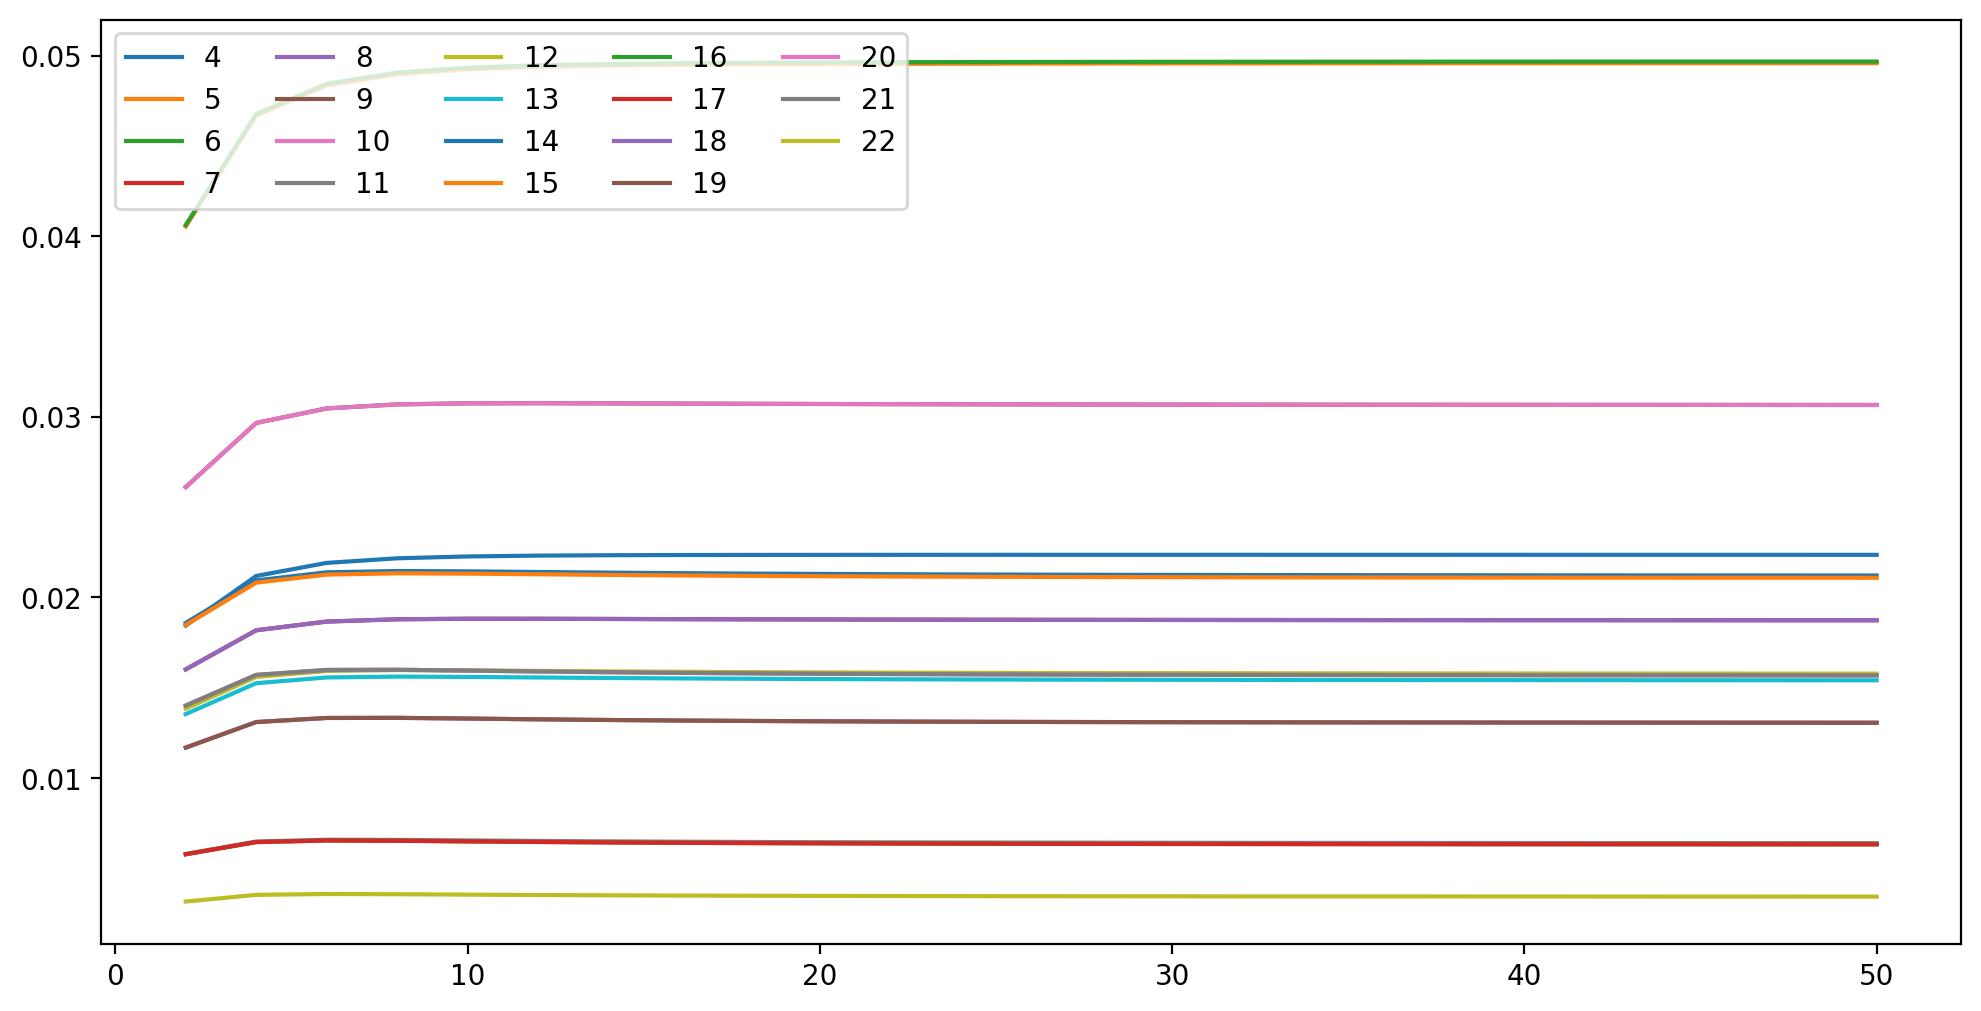

In [4]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
for i, s in enumerate(stds.T):
    if i + 4 > 0:
        ax.plot(nl, s, label=i + 4)

# ax.set(xlim=(0, 10))
ax.legend(ncol=5)


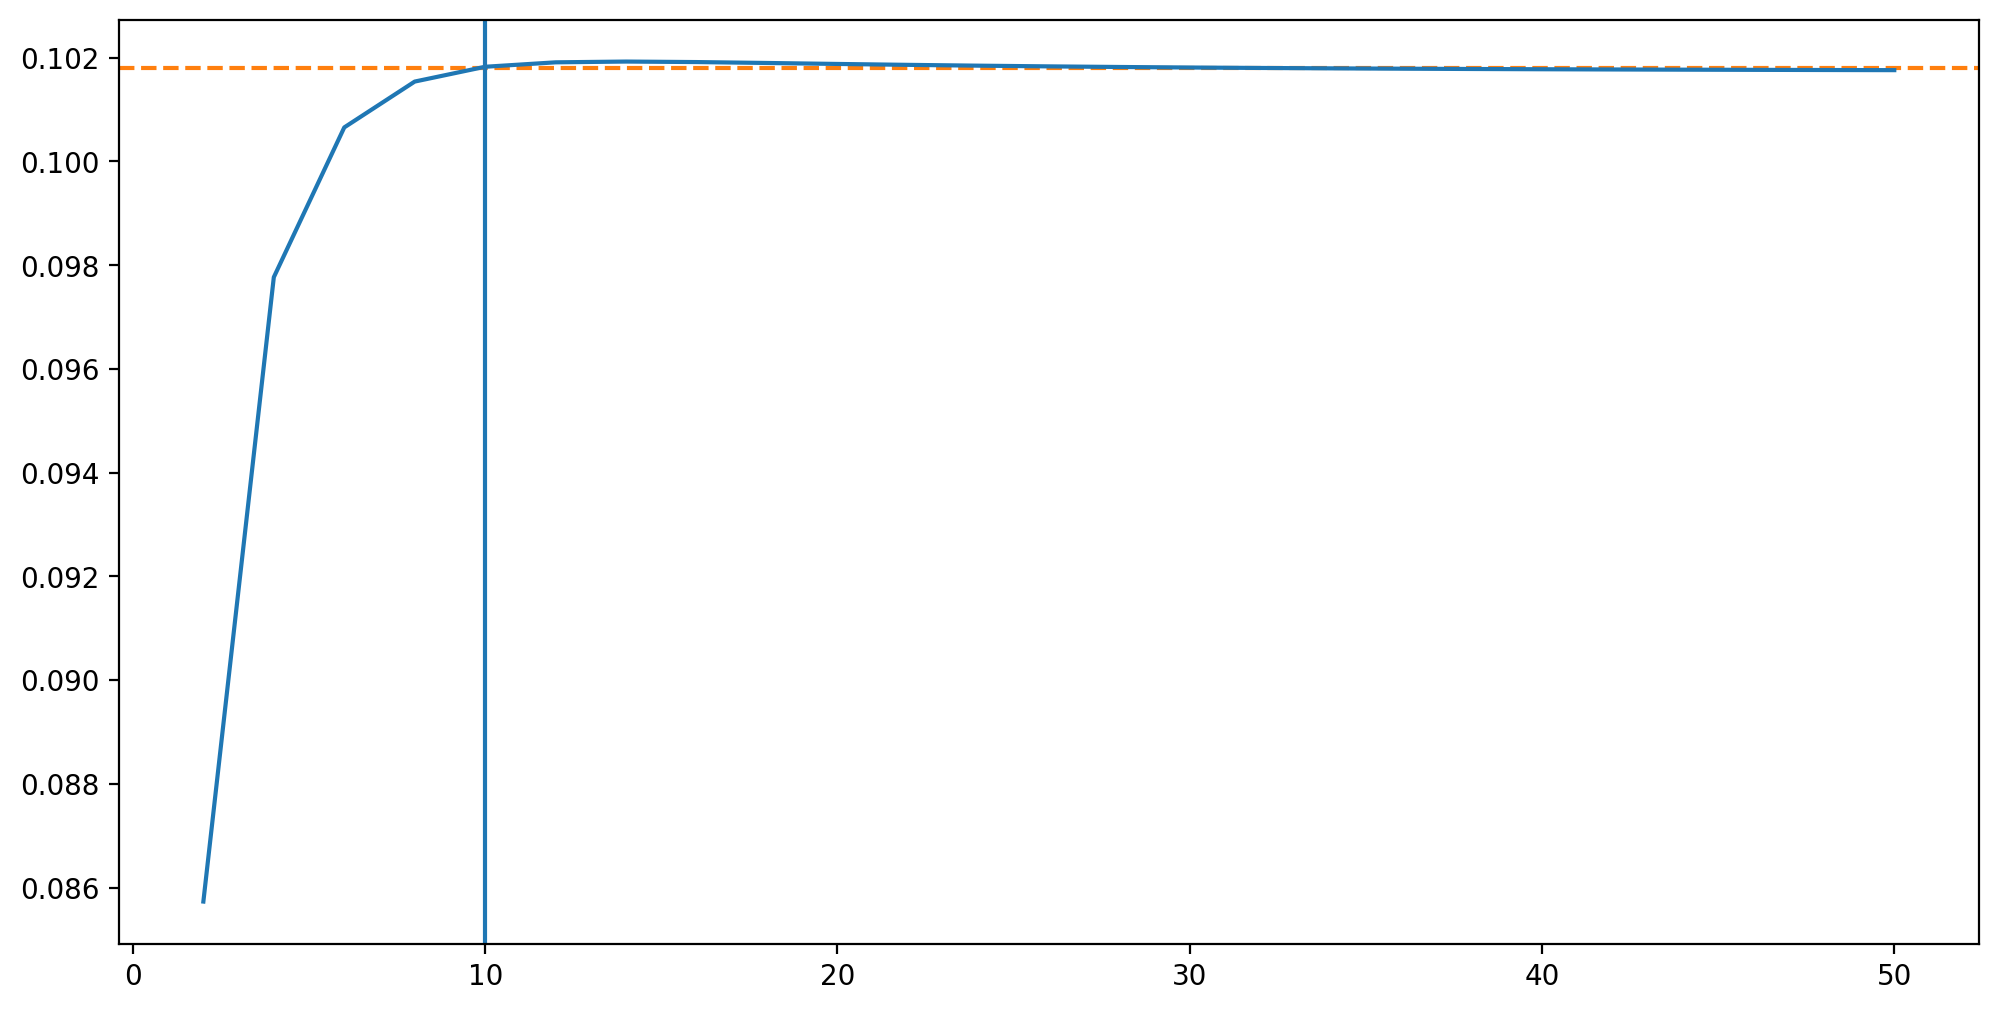

In [14]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

plt.plot(nl, np.sqrt(np.sum(np.square(stds), axis=1)))
plt.axvline(10)
plt.axhline(0.1018, c="C1", ls="--", zorder=0)


In [247]:
for i in cp_profile(10)[1]:
    print(f"{i:.5f}")


0.02927
0.00568
0.00257
0.00209
0.00195
0.00186
0.00178
0.00170
0.00162
0.00155
0.00016
0.00004
0.00004
0.00016
0.00008
0.00012


In [255]:
h = np.linspace(6, 500, 4)
y = 2.7 / 1.56 * 1e-3 * (70 * np.exp(-h / 20) + 1.4 * np.exp(-h / 900))
simps(y, h)


7.078220089789569

In [269]:
atmStat = AtmStat(theta=0)
std0 = atmStat.zk_std()

atmStat = AtmStat(theta=0.1)
std1 = atmStat.zk_std()


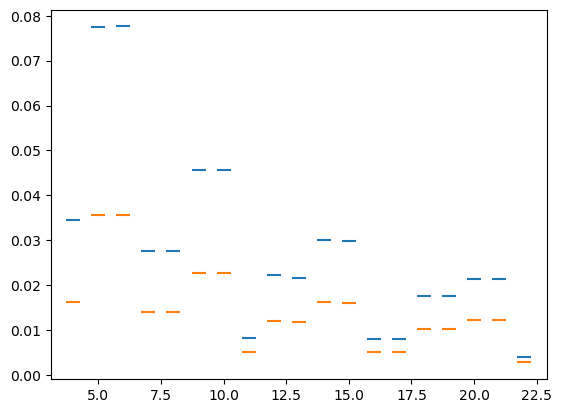

In [270]:
plt.scatter(np.arange(4, 23), std0, marker="_", s=100)
plt.scatter(np.arange(4, 23), std1, marker="_", s=100)


In [2]:
%load_ext autoreload
%autoreload 2

from utils.atm_stat import AtmStat, cp_profile
import numpy as np
import matplotlib.pyplot as plt

In [25]:
atmStat = AtmStat()


In [26]:
atmStat.params["Cn2"][1].sum()


0.0010604727791546857

In [27]:
cn2 = cp_profile(10)


In [33]:
cn2[1] = cn2[1] / cn2[1].sum()


In [34]:
cn2[1].sum()


1.0

In [42]:
atmStat.set_params(Cn2=cp_profile(10))


In [43]:
atmStat.params["Cn2"][1].sum()


1.0

In [47]:
h, cn2 = atmStat.params["Cn2"]
h = 1e3 * h


In [58]:
rho = np.array([0, 0.1, 0.2])
rho = rho[..., None] + np.deg2rad(0.2) * h[None, :] * 2
np.sum(cn2 * rho, axis=1)


array([14.57168712, 14.67168712, 14.77168712])

In [55]:
cn2.shape


(16,)

In [120]:
A = 70
h0 = 20
B = 1.4
h1 = 900

N = 5
bins = np.linspace(6, 500, N + 1)
centers = (bins[:-1] + bins[1:]) / 2

y0 = h0 * A * np.exp(-bins / h0) + h1 * B * np.exp(-bins / h1)
cn2 = (y0[:-1] - y0[1:]) / 1e3
print(cn2)
cn2.sum()


[1.15985286 0.12396602 0.10452907 0.09361467 0.08388152]


1.5658441366871398

In [121]:
centers


array([ 55.4, 154.2, 253. , 351.8, 450.6])

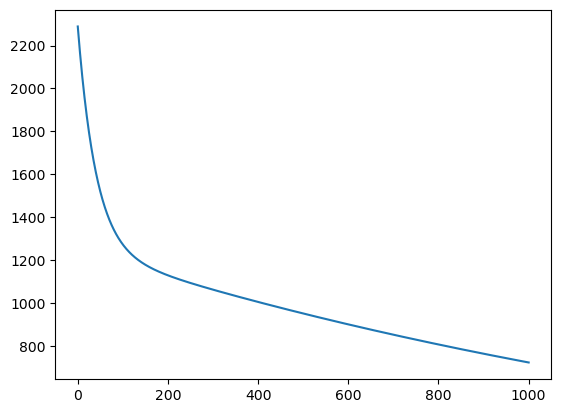

In [113]:
plt.plot(y0)


In [125]:
h, y = cp_profile(10)
y[:-6].sum(), y[-6:].sum()


(1.56584413668714, 1.5)